In [1]:
library(ggplot2)

options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [2]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [3]:
head(airbnb,n=6)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [4]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
names(airbnb) = newnames
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95




---------------------------------------------------------



Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [5]:
PieconverMet = 0.092903
airbnb$MetrosCuadrados = PieconverMet * airbnb$PiesCuadrados
head(airbnb, n=10)


,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
7,28004,Universidad,House,Private room,7,5,1,7,Real Bed,"Internet,Wireless Internet,Kitchen,Smoking allowed,Heating,Fire extinguisher,Shampoo,Lock on bedroom door,Hangers,Hair dryer,Iron,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,77,NA
8,28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA
9,28015,Universidad,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,translation missing: en.hosting_amenity_49",700,90,98,65.03210




---------------------------------------------------------



Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [6]:
levels(airbnb$CodigoPostal)

[1] ""             "-"            "20013"        "20126"        "2015"        
 [6] "25008"        "27004"        "27013"        "28"           "28001"       
[11] "280013"       "28002"        "28002\n28002" "28003"        "28004"       
[16] "28005"        "28006"        "28007"        "28008"        "28009"       
[21] "28010"        "28011"        "28012"        "28013"        "28014"       
[26] "28015"        "28016"        "28017"        "28018"        "28019"       
[31] "28020"        "28021"        "28022"        "28023"        "28024"       
[36] "28025"        "28026"        "28027"        "28028"        "28029"       
[41] "28030"        "28031"        "28032"        "28033"        "28034"       
[46] "28035"        "28036"        "28037"        "28038"        "28039"       
[51] "2804"         "28040"        "28041"        "28042"        "28043"       
[56] "28044"        "28045"        "28046"        "28047"        "28048"       
[61] "28049"        "2805"         "28050"        "28051"        "28051\n28051"
[66] "28052"        "28053"        "28054"        "28055"        "28056"       
[71] "28058"        "28060"        "28094"        "28105"        "2815"        
[76] "28850"        "Madrid 28004"

In [7]:
# Creating a not in operator:
`%notin%` = Negate(`%in%`)

In [8]:
cpOK = as.character(c((28001:28060), 28094, 28105, 28850))


airbnb$CodigoPostal[airbnb$CodigoPostal %notin% cpOK] = NA

airbnb$CodigoPostal

[1] 28004 28004 28004 28004 28015 28004 28004 28004 28015 28004 28004 28004
   [13] 28013 28005 28013 28013 28013 28012 28013 28013 28013 28005 28013 28012
   [25] 28012 28013 28014 28013 28012 28005 28005 28005 28005 28012 28005 28005
   [37] 28045 28005 28005 28005 28005 28005 28013 28013 28013 28013 28013 28012
   [49] 28013 28012 28013 28013 28013 28012 28013 28013 28012 <NA>  <NA>  28045
   [61] 28045 28045 28045 28045 28045 28045 28045 28045 28045 28045 28045 28012
   [73] 28045 28045 28045 28045 28012 28012 28012 28012 28005 28012 <NA>  28005
   [85] 28012 28012 28012 28012 28012 28005 28012 28005 28005 28012 28005 28012
   [97] 28012 28005 28005 28005 28012 28012 28005 28012 28014 28014 28014 28014
  [109] 28012 28014 28014 28014 28012 28014 28014 28014 28014 28014 28012 28012
  [121] 28014 28012 28012 28005 28012 28012 28012 28012 28012 28005 28005 <NA> 
  [133] 28012 <NA>  28012 28012 28012 28005 28012 28012 28014 28014 28045 28045
  [145] 28045 28045 28007 28007 28007 28007 28007 28007 28028 28009 28009 28009
  [157] 28009 28014 28014 28007 28005 28013 28005 28005 28013 28013 28013 28005
  [169] 28013 28013 28005 28005 28005 28013 28013 28013 28005 28013 28005 28013
  [181] 28013 28005 28013 28005 28013 28013 28005 28005 28013 28013 28005 28013
  [193] 28005 28013 28005 28013 28005 28005 28005 28005 28005 28013 28005 28005
  [205] 28005 28013 28013 28012 28005 28012 28005 28012 28005 28012 28012 28005
  [217] 28012 28005 28012 28012 28012 28012 28012 28012 28012 28012 28012 28013
  [229] 28013 28014 28012 28012 28012 28005 28005 28005 28012 28012 28005 28012
  [241] 28012 28012 28012 28012 28012 28012 28014 28014 28014 28014 28012 28014
  [253] 28014 28014 28014 28004 28004 28004 28004 28004 28004 28004 28004 28004
  [265] 28004 28001 28001 28006 28001 28001 28001 28001 28001 28001 28001 28006
  [277] 28009 <NA>  28009 28009 28009 28006 28009 28006 28006 <NA>  28028 <NA> 
  [289] 28028 28028 28004 28004 28004 28004 28004 28004 28004 28004 28004 28004
  [301] 28004 28004 28004 28004 28004 28004 28004 28004 28004 28004 28004 28004
  [313] 28015 28004 28004 28004 28015 28004 28004 28015 28004 28004 28004 28004
  [325] 28004 28013 28015 28004 28015 28004 28004 28004 28015 28004 28004 28004
  [337] 28015 28015 28015 28015 28015 28015 28015 28010 28015 28010 28010 28010
  [349] 28010 28010 28010 28010 28004 28010 28010 28010 28028 28028 28028 28028
  [361] 28006 28006 28006 28006 28002 28002 28006 28002 28002 28034 28050 28008
  [373] 28011 28011 28049 28038 28053 28038 28047 28011 28011 28011 28011 28011
  [385] 28011 28011 28047 28011 28011 28011 28011 <NA>  28025 28019 28019 28024
  [397] 28019 28019 28019 28019 28019 <NA>  28025 28019 28002 28002 28002 28016
  [409] 28016 28036 28016 28016 28016 28036 28016 28046 28039 28039 28020 28020
  [421] 28020 28020 28020 28020 28003 28029 28029 28029 28020 28015 28015 28015
  [433] 28015 28015 28015 28015 28015 28015 28015 28010 28003 28003 28003 28003
  [445] 28003 28003 28029 28008 28008 28008 28008 28008 28015 28008 28008 28008
  [457] 28008 28008 28008 28008 28008 28025 28025 28025 28054 28025 28041 28041
  [469] 28026 28026 28026 28038 28053 28058 28053 28053 28018 28018 28018 28053
  [481] 28053 28030 28030 28030 28017 28017 28027 28027 28027 28027 28027 28027
  [493] 28027 28027 28027 28043 28033 28043 28043 28033 28033 28033 28033 28033
  [505] 28033 28041 28050 28055 28021 28041 28032 28032 28032 28032 28037 28037
  [517] 28022 28027 28042 28004 28004 28004 28004 28004 28004 28004 28015 28004
  [529] 28004 <NA>  28004 28004 28004 28094 28013 <NA>  28005 28005 28005 28013
  [541] 28005 28005 28013 28005 28005 28005 28005 28005 28013 28013 28005 28013
  [553] 28009 28001 28001 28009 28001 28001 28001 28001 28001 28028 28001 28006
  [565] 28028 28028 28028 28028 28012 28012 28012 28012 28013 28014 28012 28012
  [577] 28013 28005 28013 28013 28013 28012 28013 28013 28045 28045 28045 28045
  [589] 28045 28045 28045 28045 28045 28045 28012 <NA>  28045 28012 28045 28003
  [6

In [9]:
airbnb$CodigoPostal = as.numeric(as.character(airbnb$CodigoPostal))



---------------------------------------------------------



Una vez limpios los datos ¿Cuales son los códigos postales que tenemos?

In [10]:
tablaCP = table(airbnb$CodigoPostal)
tablaCP


28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 28013 
  231   170   185  1794  1194   218   206   338   216   384   250  2060  1019 
28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 28026 
  630   600    76   107    43   200   192    58    30    23    44   123    93 
28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 28039 
  122   263   110    73    27    33    89    45    59    67    65    77   160 
28040 28041 28042 28043 28044 28045 28046 28047 28048 28049 28050 28051 28052 
   16    63    90   103    19   495    32    67     1     3    58    16     1 
28053 28054 28055 28056 28058 28060 28094 28105 28850 
   85    12    12     1     1     1     1     1     1 



---------------------------------------------------------



¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [11]:
topCP5 = head(sort(tablaCP, decreasing = TRUE),n=5)
bottomCP5 = head(sort(tablaCP),n=5)

print("Los cinco códigos postales que más se repiten son :")
topCP5
print("Los cinco códigos postales que menos se repiten son :")
bottomCP5

[1] "Los cinco códigos postales que más se repiten son :"



28012 28004 28005 28013 28014 
 2060  1794  1194  1019   630 

[1] "Los cinco códigos postales que menos se repiten son :"



28048 28052 28056 28058 28060 
    1     1     1     1     1 



---------------------------------------------------------



¿Cuales son los barrios que hay en el código postal 28012?

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [12]:
barriosCP = as.character(airbnb$Barrio[airbnb$CodigoPostal==28012])
tablaBarriosCP = table(barriosCP)
tablaBarriosCP

barriosCP
        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 



---------------------------------------------------------



¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [13]:
barrios = unique(as.character(airbnb$Barrio))
nBarrios = length(barrios)

paste("El número de barrios en todo el dataset es de : ", nBarrios)
paste("Esos", nBarrios, "barrios son los siguientes: ")
barrios

[1] "El número de barrios en todo el dataset es de :  125"

[1] "Esos 125 barrios son los siguientes: "

[1] "Universidad"                  "Sol"                         
  [3] "Imperial"                     "Acacias"                     
  [5] "Chopera"                      "Delicias"                    
  [7] "Palos de Moguer"              "Embajadores"                 
  [9] "Cortes"                       "Atocha"                      
 [11] "Pacífico"                     "Adelfas"                     
 [13] "Estrella"                     "Ibiza"                       
 [15] "Jerónimos"                    "Niño Jesús"                  
 [17] "Palacio"                      "Justicia"                    
 [19] "Recoletos"                    "Goya"                        
 [21] "Fuente del Berro"             "Arapiles"                    
 [23] "Trafalgar"                    "Almagro"                     
 [25] "Guindalera"                   "Lista"                       
 [27] "Castellana"                   "El Viso"                     
 [29] "Prosperidad"                  "Valverde"                    
 [31] "Casa de Campo"                "El Goloso"                   
 [33] "Numancia"                     "Cármenes"                    
 [35] "Puerta del Angel"             "Lucero"                      
 [37] "Aluche"                       "San Isidro"                  
 [39] "Campamento"                   "Comillas"                    
 [41] "Opañel"                       "Vista Alegre"                
 [43] "Ciudad Jardín"                "Hispanoamérica"              
 [45] "Nueva España"                 "Castilla"                    
 [47] "Bellas Vistas"                "Cuatro Caminos"              
 [49] "Castillejos"                  "Vallehermoso"                
 [51] "Almenara"                     "Valdeacederas"               
 [53] "Berruguete"                   "Gaztambide"                  
 [55] "Rios Rosas"                   "Peñagrande"                  
 [57] "Argüelles"                    "Puerta Bonita"               
 [59] "Buenavista"                   "Abrantes"                    
 [61] "Orcasur"                      "San Fermín"                  
 [63] "Almendrales"                  "Pradolongo"                  
 [65] "Portazgo"                     "Entrevías"                   
 [67] "San Diego"                    "Palomeras Bajas"             
 [69] "Fontarrón"                    "Vinateros"                   
 [71] "Ventas"                       "Pueblo Nuevo"                
 [73] "Quintana"                     "Concepción"                  
 [75] "San Juan Bautista"            "Costillares"                 
 [77] "Piovera"                      "Canillas"                    
 [79] "Pinar del Rey"                "Apostol Santiago"            
 [81] "San Andrés"                   "Valdefuentes"                
 [83] "Butarque"                     "Los Angeles"                 
 [85] "Casco Histórico de Vicálvaro" "Simancas"                    
 [87] "Rejas"                        "Salvador"                    
 [89] "Casco Histórico de Barajas"   "Pilar"                       
 [91] "La Paz"                       "Mirasierra"                  
 [93] "Ciudad Universitaria"         "Moscardó"                    
 [95] "Palomeras Sureste"            "Marroquina"                  
 [97] "Media Legua"                  "Los Rosales"                 
 [99] "Casco Histórico de Vallecas"  "Timón"                       
[101] "Corralejos"                   "Cuatro Vientos"              
[103] "Colina"                       "San Cristobal"               
[105] "Alameda de Osuna"             "Aeropuerto"                  
[107] "Palomas"                      "Zofío"                       
[109] "Aguilas"                      "Legazpi"                     
[111] "Fuentelareina"                "Aravaca"                     
[113] "Ambroz"                       "Canillejas"                  
[115] "Valdezarza"                   "Amposta"                     
[117] "San Pascual"                  "Santa Eugenia"      



---------------------------------------------------------



¿Cuales son los 5 barrios que tienen mayor número entradas?

In [14]:
barriosEntrada = as.character(airbnb$Barrio[airbnb$CodigoPostal==28012])
topBarrio5 = head(sort(tablaBarriosCP, decreasing = TRUE),n=5)
topBarrio5

barriosCP
    Embajadores             Sol          Cortes Palos de Moguer         Palacio 
           1449             301             216              46              27 



---------------------------------------------------------



¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [15]:
tipoAlquiler = unique(as.character(airbnb$TipoAlquiler))

nTipoAlquiler = length(tipoAlquiler)

tablaTipoAlquiler = table(as.character(airbnb$TipoAlquiler))

print("Tipos de alquileres: ")
tipoAlquiler
paste("Número de distintos tipos de alquileres: ", nTipoAlquiler)
print("Número de entradas por cada tipo: ")
tablaTipoAlquiler

[1] "Tipos de alquileres: "


[1] "Private room"    "Entire home/apt" "Shared room"

[1] "Número de distintos tipos de alquileres:  3"

[1] "Número de entradas por cada tipo: "



Entire home/apt    Private room     Shared room 
           7903            5113             191 



---------------------------------------------------------



Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


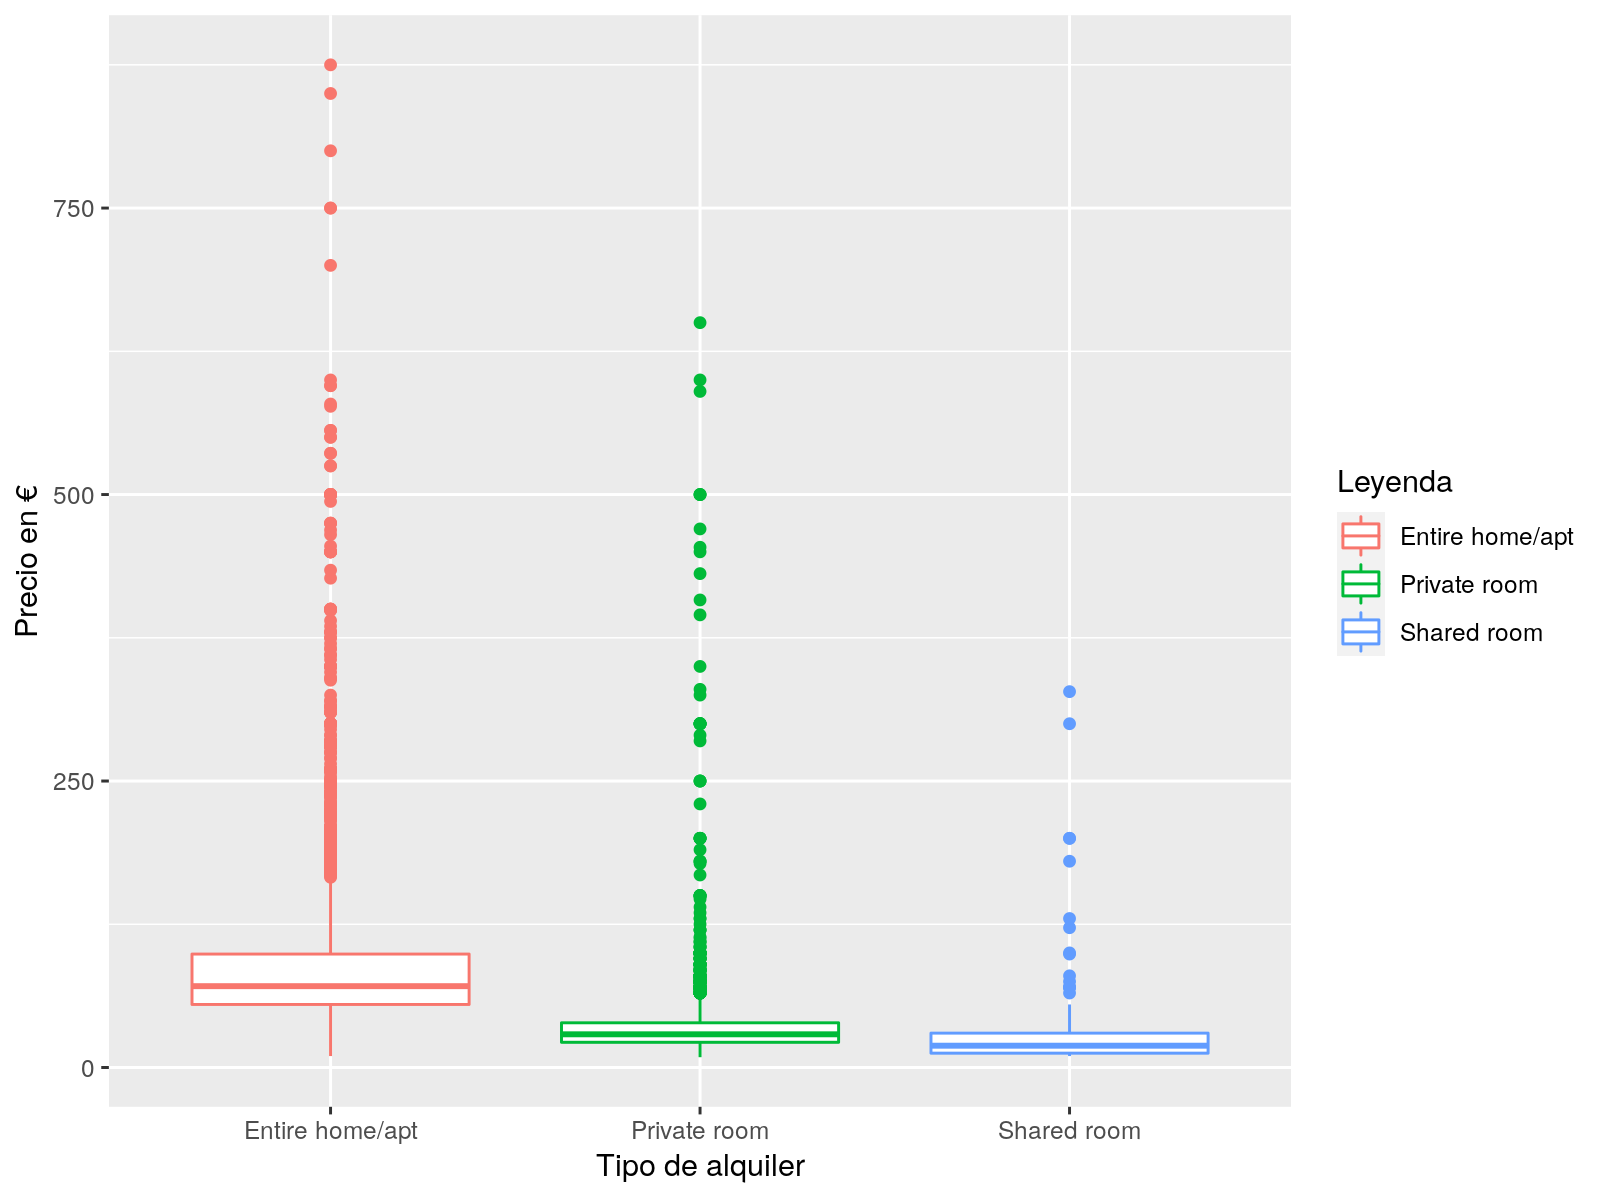

In [16]:
library("ggplot2")
options(repr.plot.height=6,repr.plot.width=8 , repr.plot.res = 200)
ggplot(data=airbnb, aes(x=TipoAlquiler, y=Precio,color=TipoAlquiler))+geom_boxplot()+
 scale_color_discrete(name="Leyenda")+xlab('Tipo de alquiler')+ylab('Precio en €')



---------------------------------------------------------



Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [17]:
precioEntero = na.omit(airbnb$Precio[airbnb$TipoAlquiler=="Entire home/apt"])
precioPrivado = na.omit(airbnb$Precio[airbnb$TipoAlquiler=="Private room"])
precioCompartido = na.omit(airbnb$Precio[airbnb$TipoAlquiler=="Shared room"])

mediaPrecioEntero = mean(precioEntero)
mediaPrecioPrivado = mean(precioPrivado)
mediaPrecioCompartido = mean(precioCompartido)

sdEntero = sd(precioEntero)
sdPrivado = sd(precioPrivado)
sdCompartido = sd(precioCompartido)

paste("El precio medio del alquiler de un apartamento entero es ", mediaPrecioEntero)
paste("La desviación típica es : ", sdEntero)
print("---------------------")
paste("El precio medio del alquiler de una habitación privada es ", mediaPrecioPrivado)
paste("La desviación típica es : ", sdPrivado)
print("---------------------")
paste("El precio medio del alquiler de una habitación compartida es ",mediaPrecioCompartido)
paste("La desviación típica es : ", sdCompartido)


[1] "El precio medio del alquiler de un apartamento entero es  87.2966058763931"

[1] "La desviación típica es :  58.4406958124831"

[1] "---------------------"


[1] "El precio medio del alquiler de una habitación privada es  34.255135981217"

[1] "La desviación típica es :  31.7137678766116"

[1] "---------------------"


[1] "El precio medio del alquiler de una habitación compartida es  29.8534031413613"

[1] "La desviación típica es :  40.6432421577624"

**Podemos deducir que las medias no son representativas porque existe una dispersión muy grande.**



---------------------------------------------------------



Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [18]:
library(dplyr)
airbnb_entire = filter(airbnb, TipoAlquiler == 'Entire home/apt')
airbnb_entire


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
<dbl>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA
28015,Universidad,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,translation missing: en.hosting_amenity_49",700,90,98,65.03210
28004,Universidad,Apartment,Entire home/apt,4,2,2,2,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Hot tub,Heating,Family/kid friendly,Washer,Dryer,Essentials,Hair dryer,Iron",NA,155,NA,NA
28004,Universidad,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo",40,70,90,3.71612




---------------------------------------------------------



¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [19]:
barriosEntire = as.character(airbnb_entire$Barrio)
tablaBarriosEntire = table(barriosEntire)

top5BarrioEntire =  head(sort(tablaBarriosEntire, decreasing = TRUE),n=5)
top5BarrioEntire

barriosEntire
Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 



---------------------------------------------------------



¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [20]:
BarriosEntirePrecio = aggregate(Precio~Barrio,airbnb_entire,mean,na.rm=TRUE)
#BarriosEntirePrecio
BarriosEntirePrecioOrd = BarriosEntirePrecio[order(-BarriosEntirePrecio$Precio), ]
head(BarriosEntirePrecioOrd, 5)

,Barrio,Precio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889




---------------------------------------------------------



¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [21]:
BarriosEntireFreq = as.data.frame(table(airbnb_entire$Barrio))
names(BarriosEntireFreq) = c("Barrio", "Freq")

BarriosEntireMerge = merge.data.frame(x = BarriosEntirePrecio, y = BarriosEntireFreq, by = "Barrio", all=T)

head(BarriosEntireMerge, 5)

,Barrio,Precio,Freq
,<fct>,<dbl>,<int>
1,Abrantes,46.00000,3
2,Acacias,68.16393,61
3,Adelfas,68.72727,33
4,Aeropuerto,38.00000,2
5,Aguilas,54.50000,2




---------------------------------------------------------



Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [22]:
mayorCien = BarriosEntireMerge[BarriosEntireMerge$Freq > 100,]
mayorCienOrd = mayorCien[order(-mayorCien$Precio), ]
topEntirePrecioFreq = mayorCienOrd[1:5,]
topEntirePrecioFreq

,Barrio,Precio,Freq
,<fct>,<dbl>,<int>
98,Recoletos,161.92537,135
56,Goya,111.33803,142
112,Sol,100.75036,701
114,Trafalgar,98.57848,223
63,Justicia,98.25468,534




---------------------------------------------------------



Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


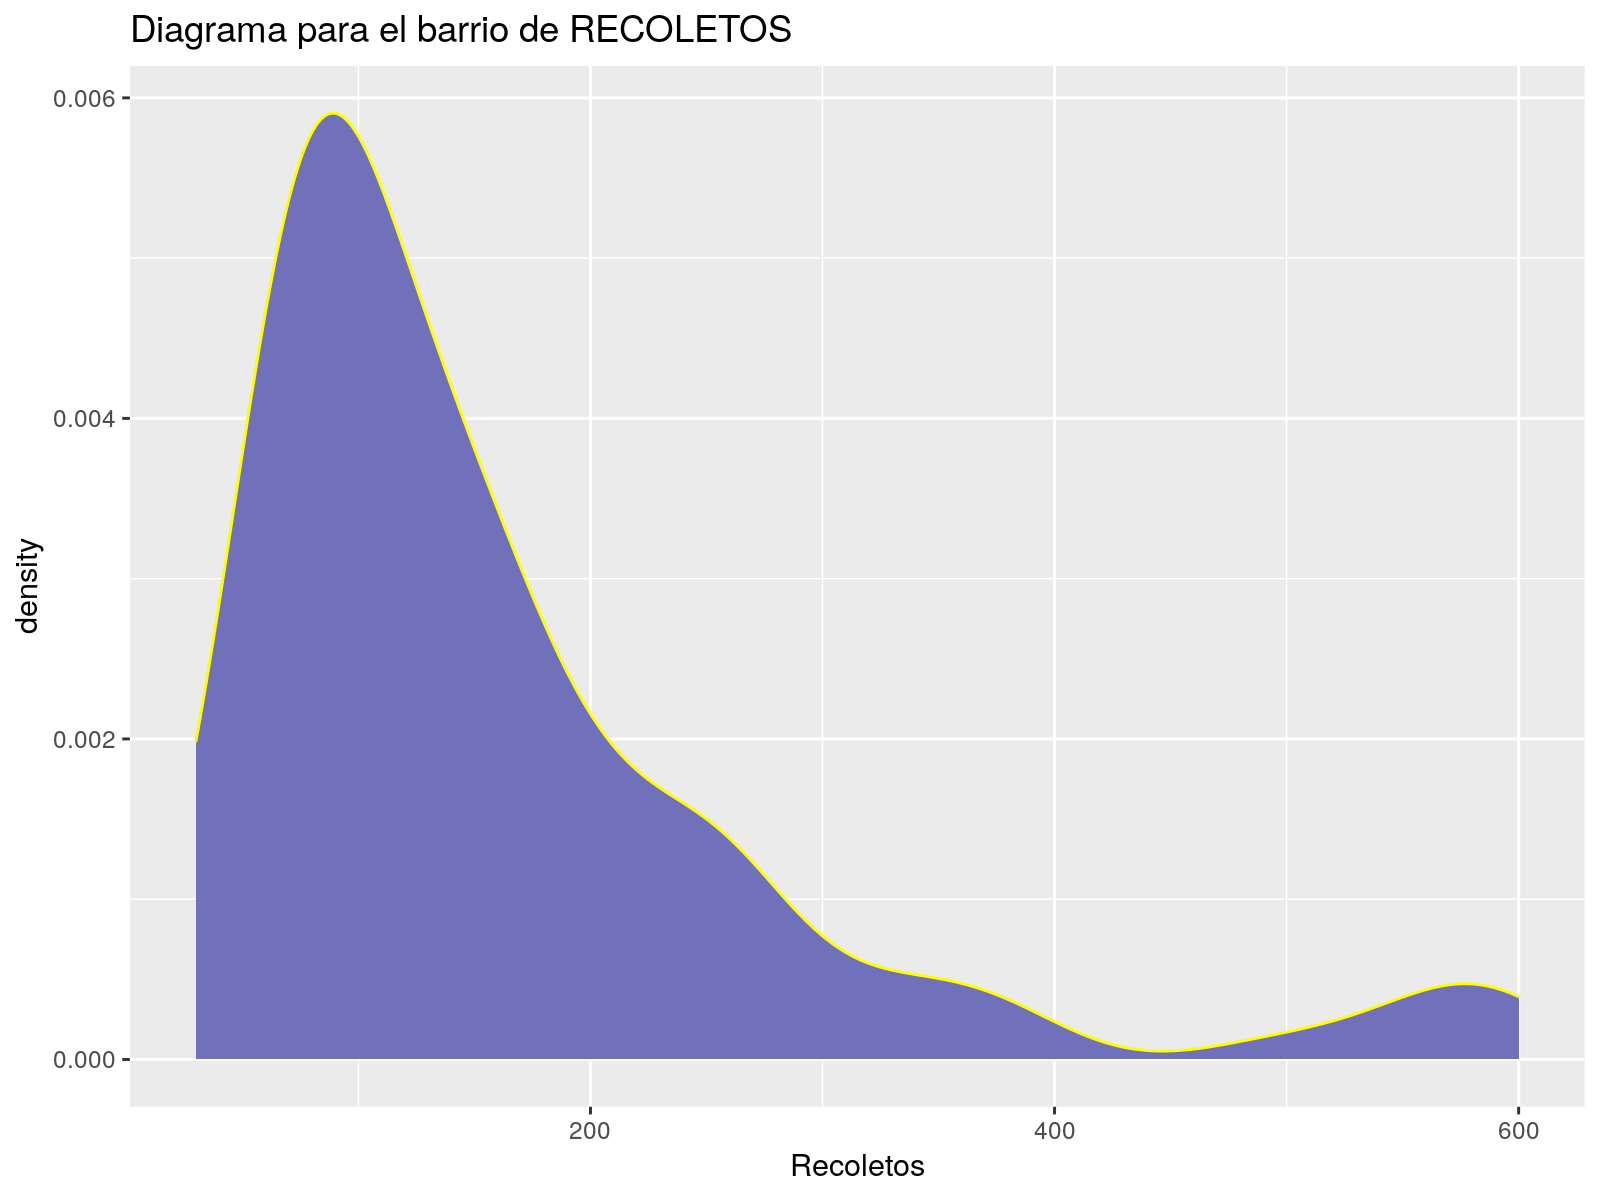

In [23]:

barrioRecoletos = data.frame(airbnb_entire$Precio[airbnb_entire$Barrio=="Recoletos"])
names(barrioRecoletos) = c("Recoletos")

ggplot(data=barrioRecoletos, aes(x=Recoletos)) + geom_density(fill="#7070BB", color="yellow") +
ggtitle("Diagrama para el barrio de RECOLETOS")


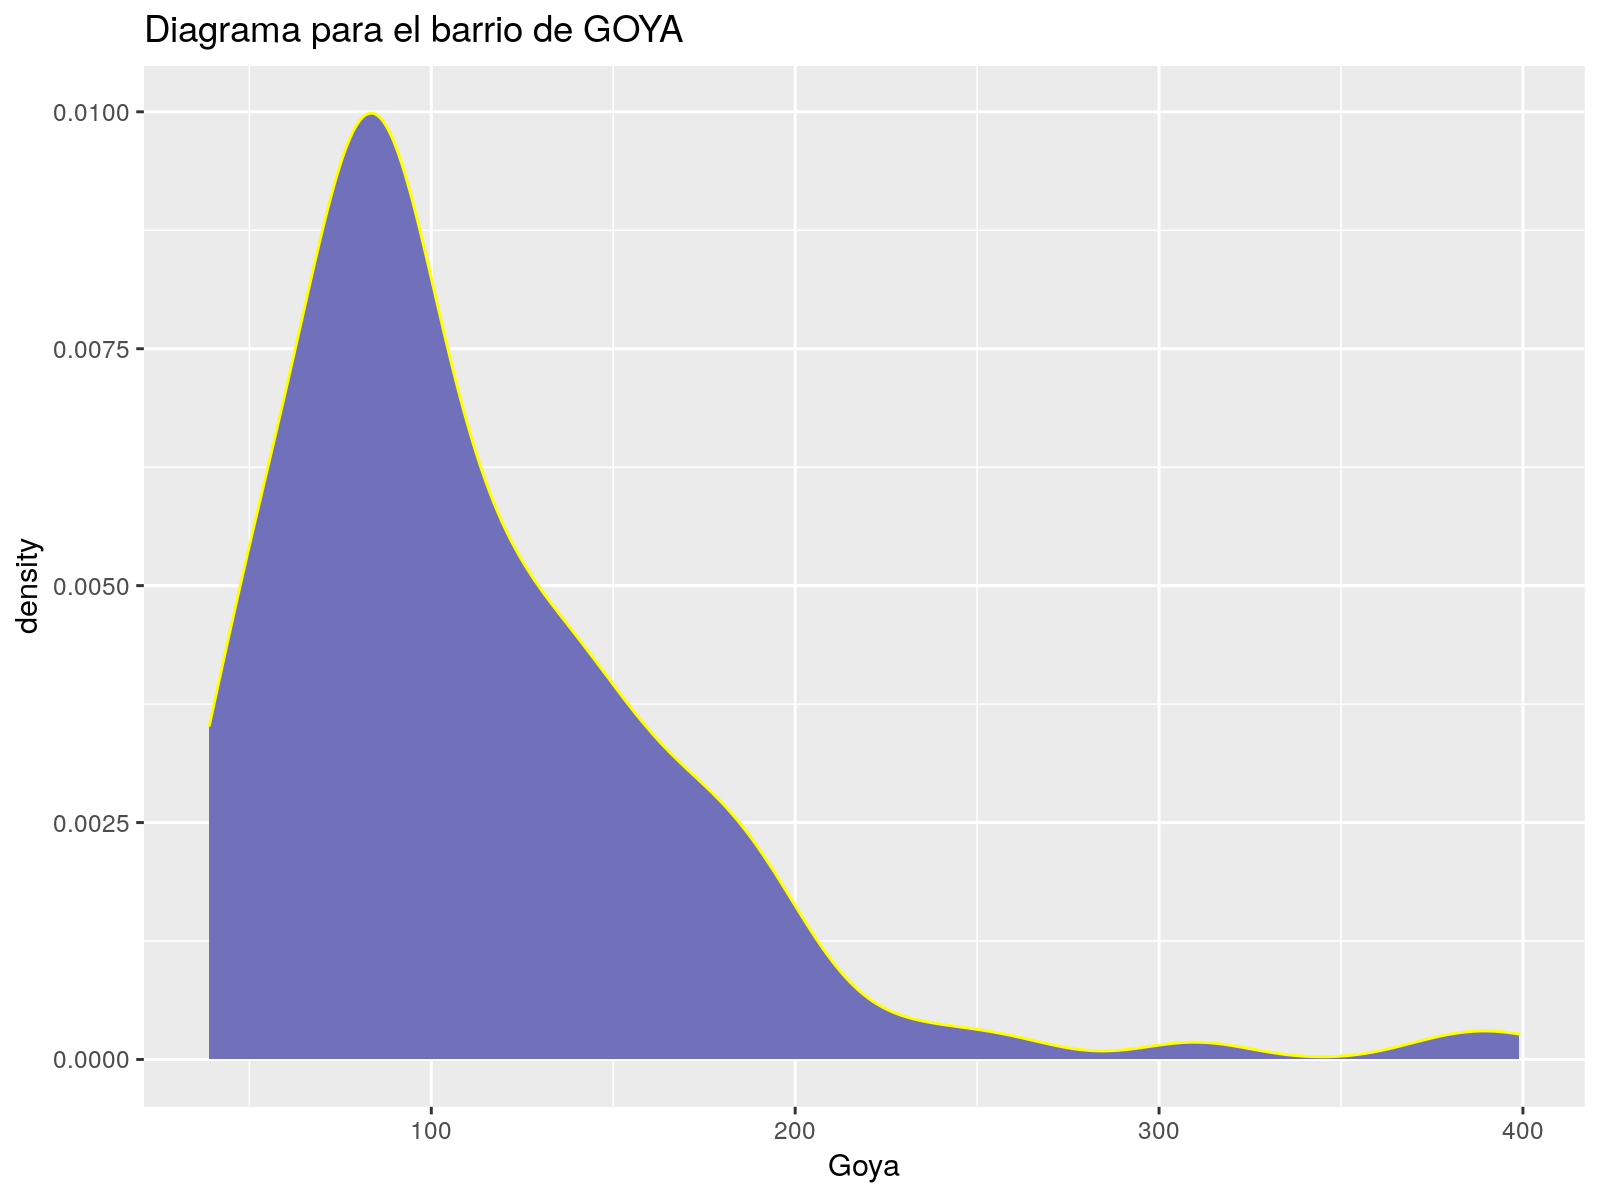

In [24]:
barrioGoya = data.frame(airbnb_entire$Precio[airbnb_entire$Barrio=="Goya"])
names(barrioGoya) = c("Goya")

ggplot(data=barrioGoya, aes(x=Goya)) + geom_density(fill="#7070BB", color="yellow") +
ggtitle("Diagrama para el barrio de GOYA")


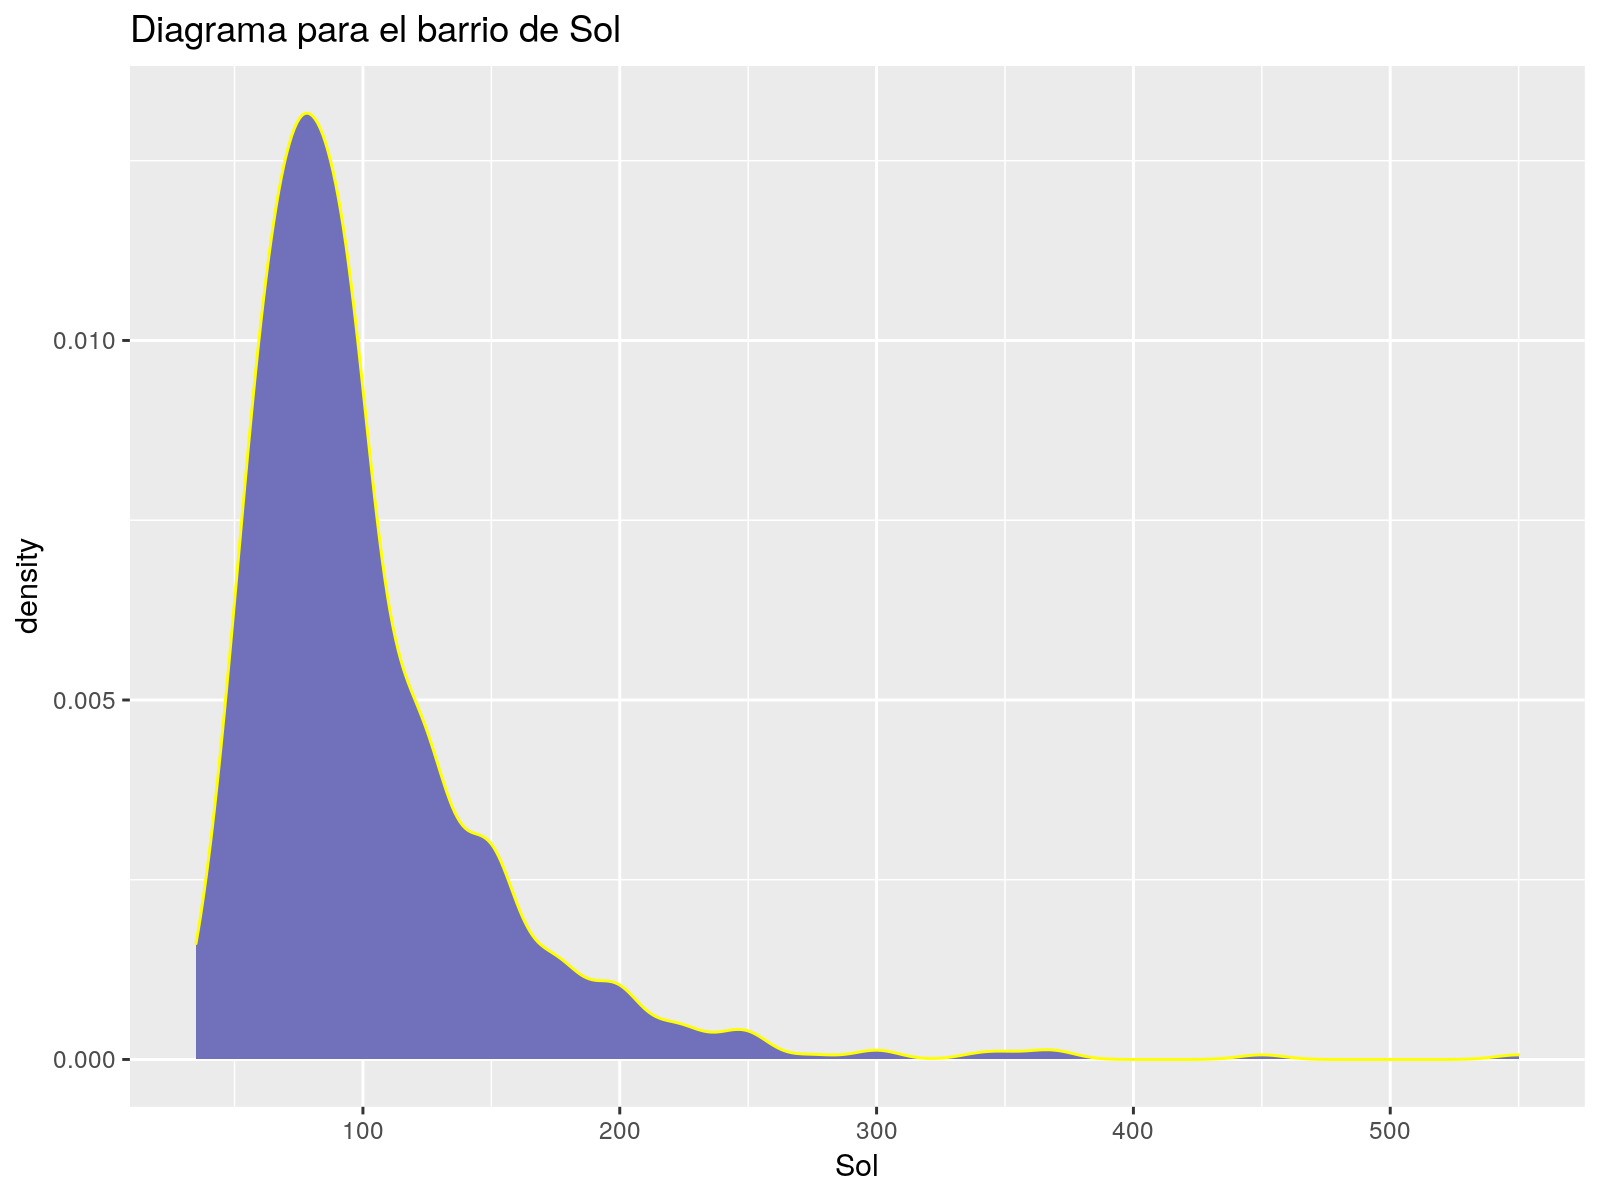

In [25]:
barrioSol = data.frame(airbnb_entire$Precio[airbnb_entire$Barrio=="Sol"])
names(barrioSol) = c("Sol")

ggplot(data=barrioSol, aes(x=Sol)) + geom_density(fill="#7070BB", color="yellow") +
ggtitle("Diagrama para el barrio de Sol")

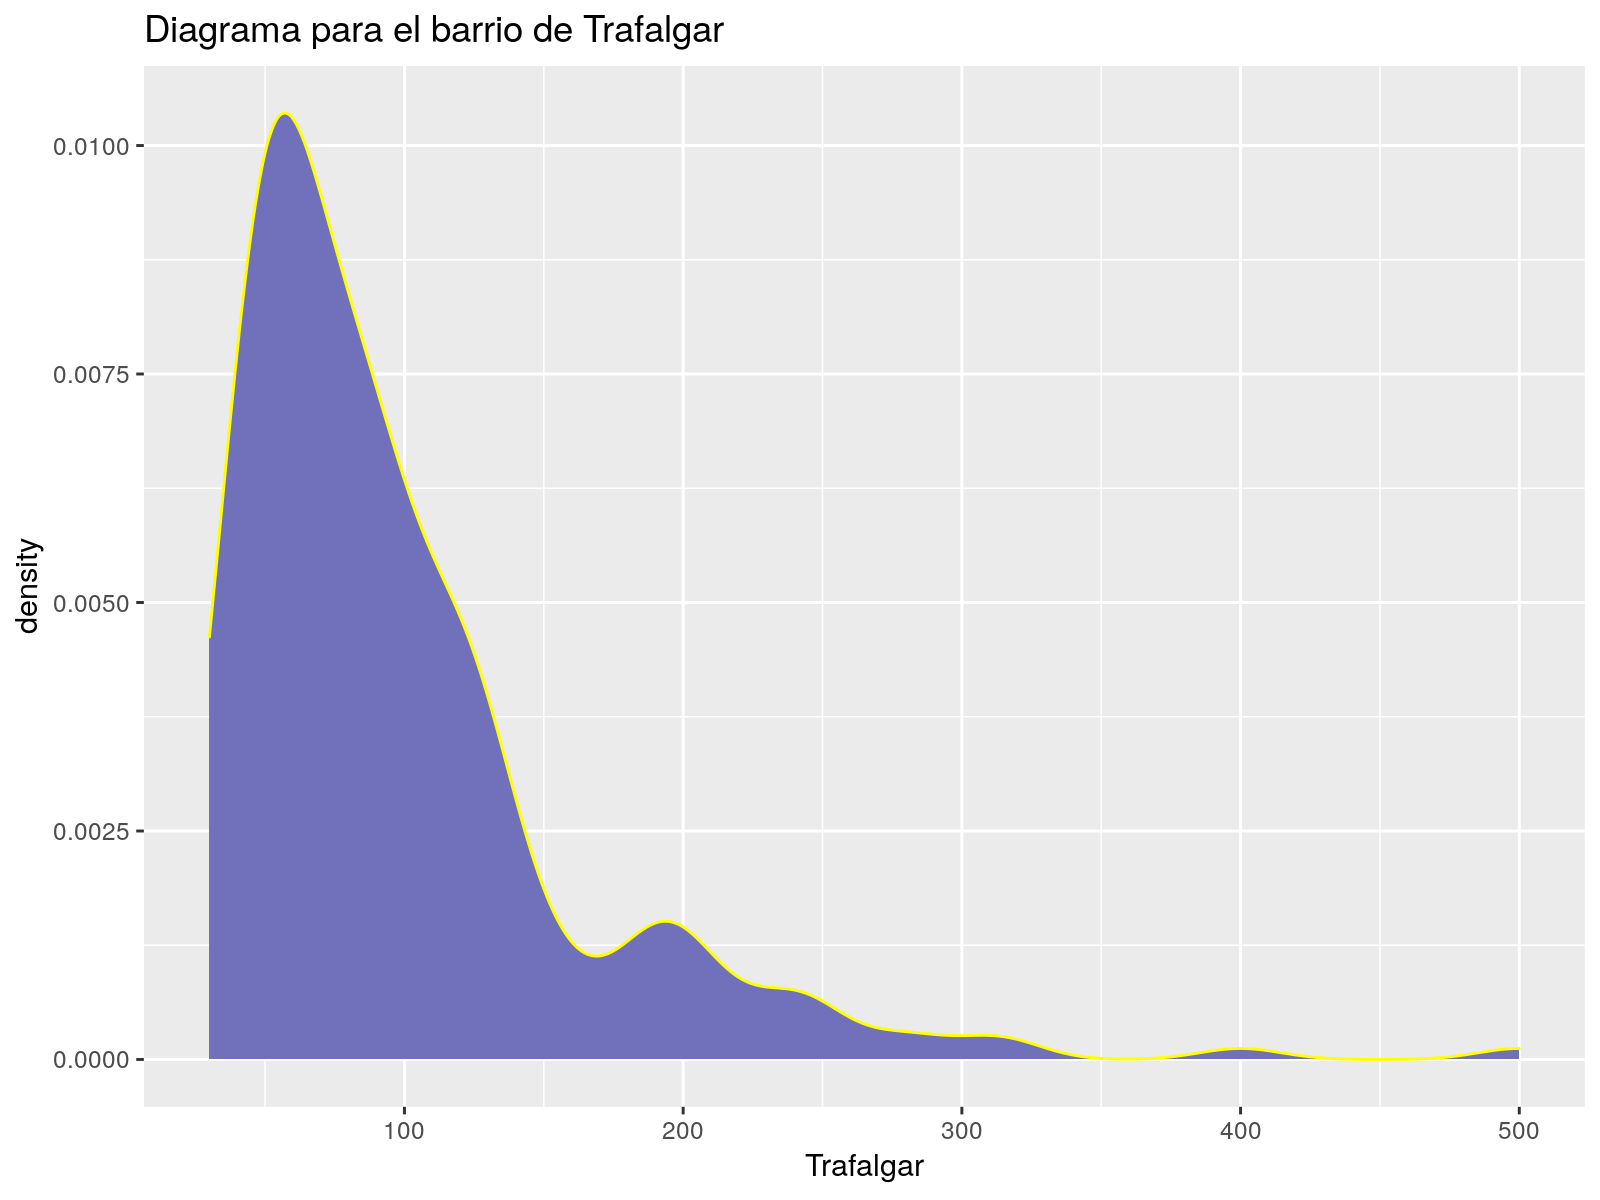

In [26]:
barrioTrafalgar = data.frame(airbnb_entire$Precio[airbnb_entire$Barrio=="Trafalgar"])
names(barrioTrafalgar) = c("Trafalgar")

ggplot(data=barrioTrafalgar, aes(x=Trafalgar)) + geom_density(fill="#7070BB", color="yellow") +
ggtitle("Diagrama para el barrio de Trafalgar")

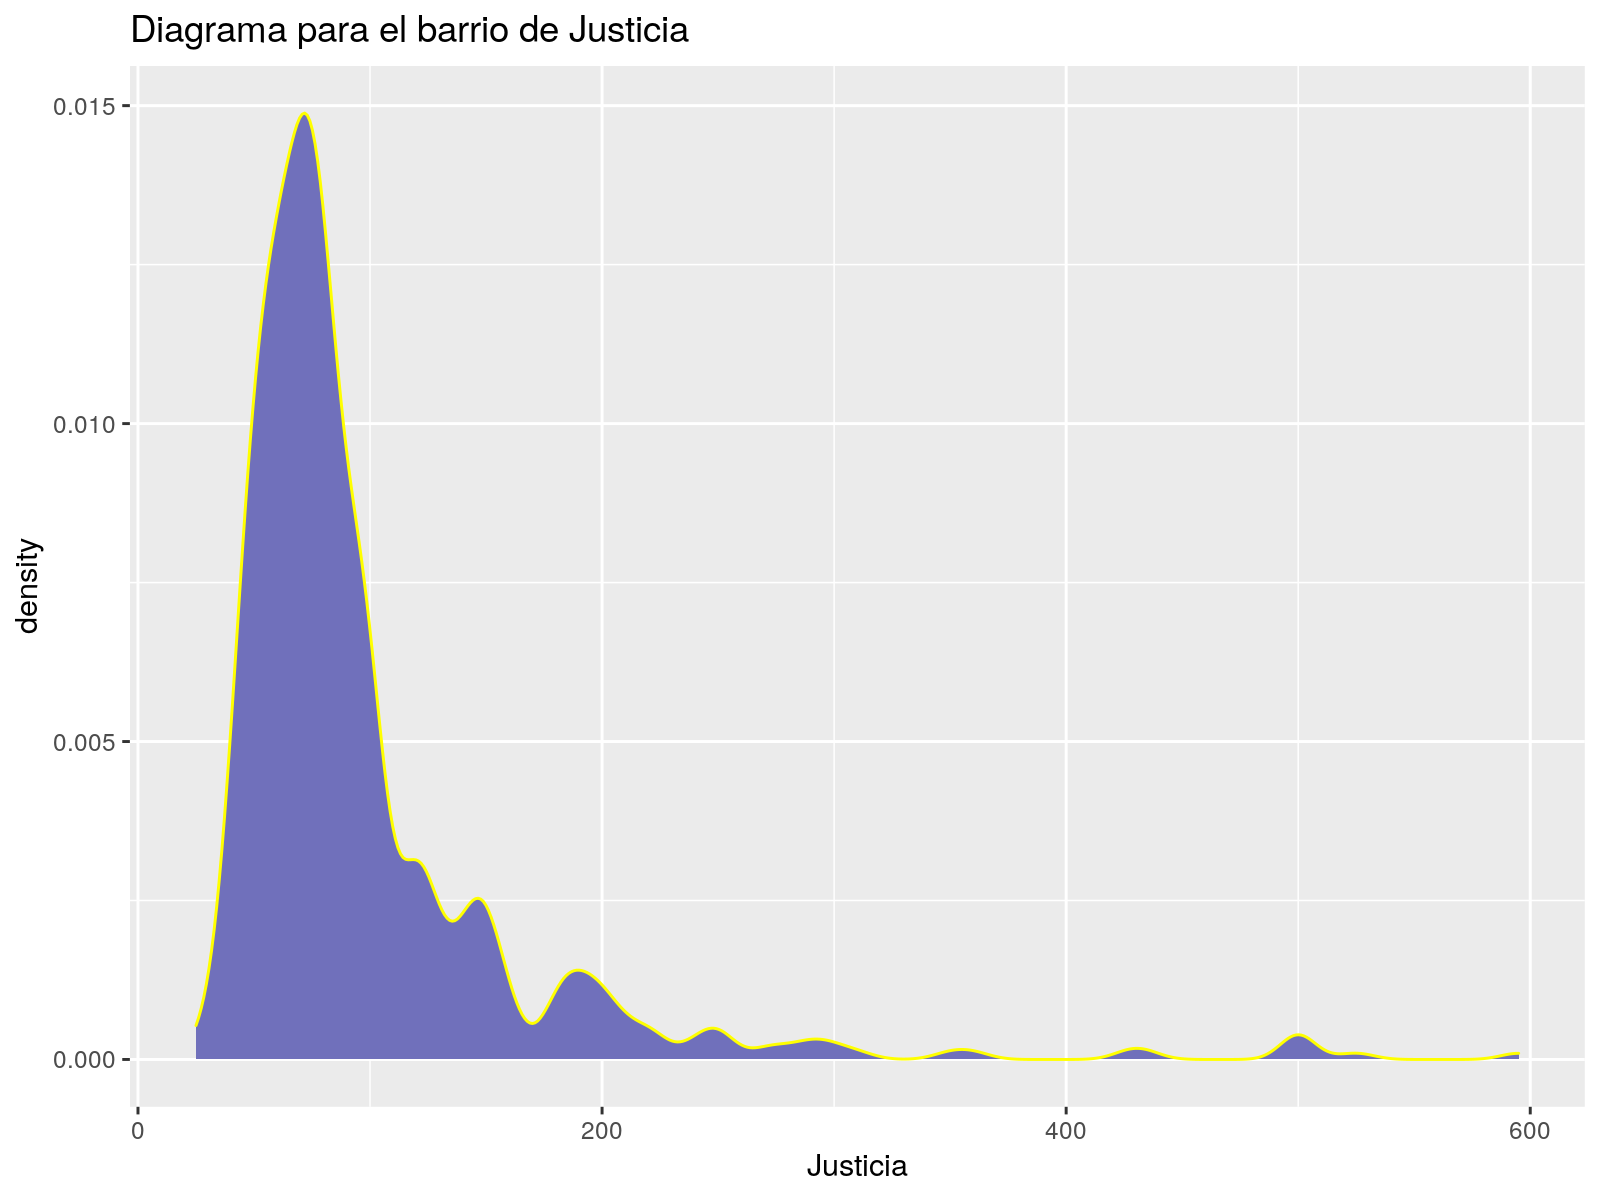

In [27]:
barrioJusticia = data.frame(airbnb_entire$Precio[airbnb_entire$Barrio=="Justicia"])
names(barrioJusticia) = c("Justicia")

ggplot(data=barrioJusticia, aes(x=Justicia)) + geom_density(fill="#7070BB", color="yellow") +
ggtitle("Diagrama para el barrio de Justicia")



---------------------------------------------------------



Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [28]:
BarriosEntireMetrosCuadrados = aggregate(MetrosCuadrados~Barrio,airbnb_entire,mean,na.rm=TRUE)

BarriosTopEntireMerge = merge.data.frame(x = topEntirePrecioFreq, y = BarriosEntireMetrosCuadrados, by = "Barrio", all.x=T)


BarriosTopEntireMerge = BarriosTopEntireMerge[order(-BarriosTopEntireMerge$Precio),]
BarriosTopEntireMerge

,Barrio,Precio,Freq,MetrosCuadrados
,<fct>,<dbl>,<int>,<dbl>
3,Recoletos,161.92537,135,26.66316
1,Goya,111.33803,142,51.68504
4,Sol,100.75036,701,45.61692
5,Trafalgar,98.57848,223,29.30426
2,Justicia,98.25468,534,28.52669


---

Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 132 rows containing non-finite values (stat_density).”


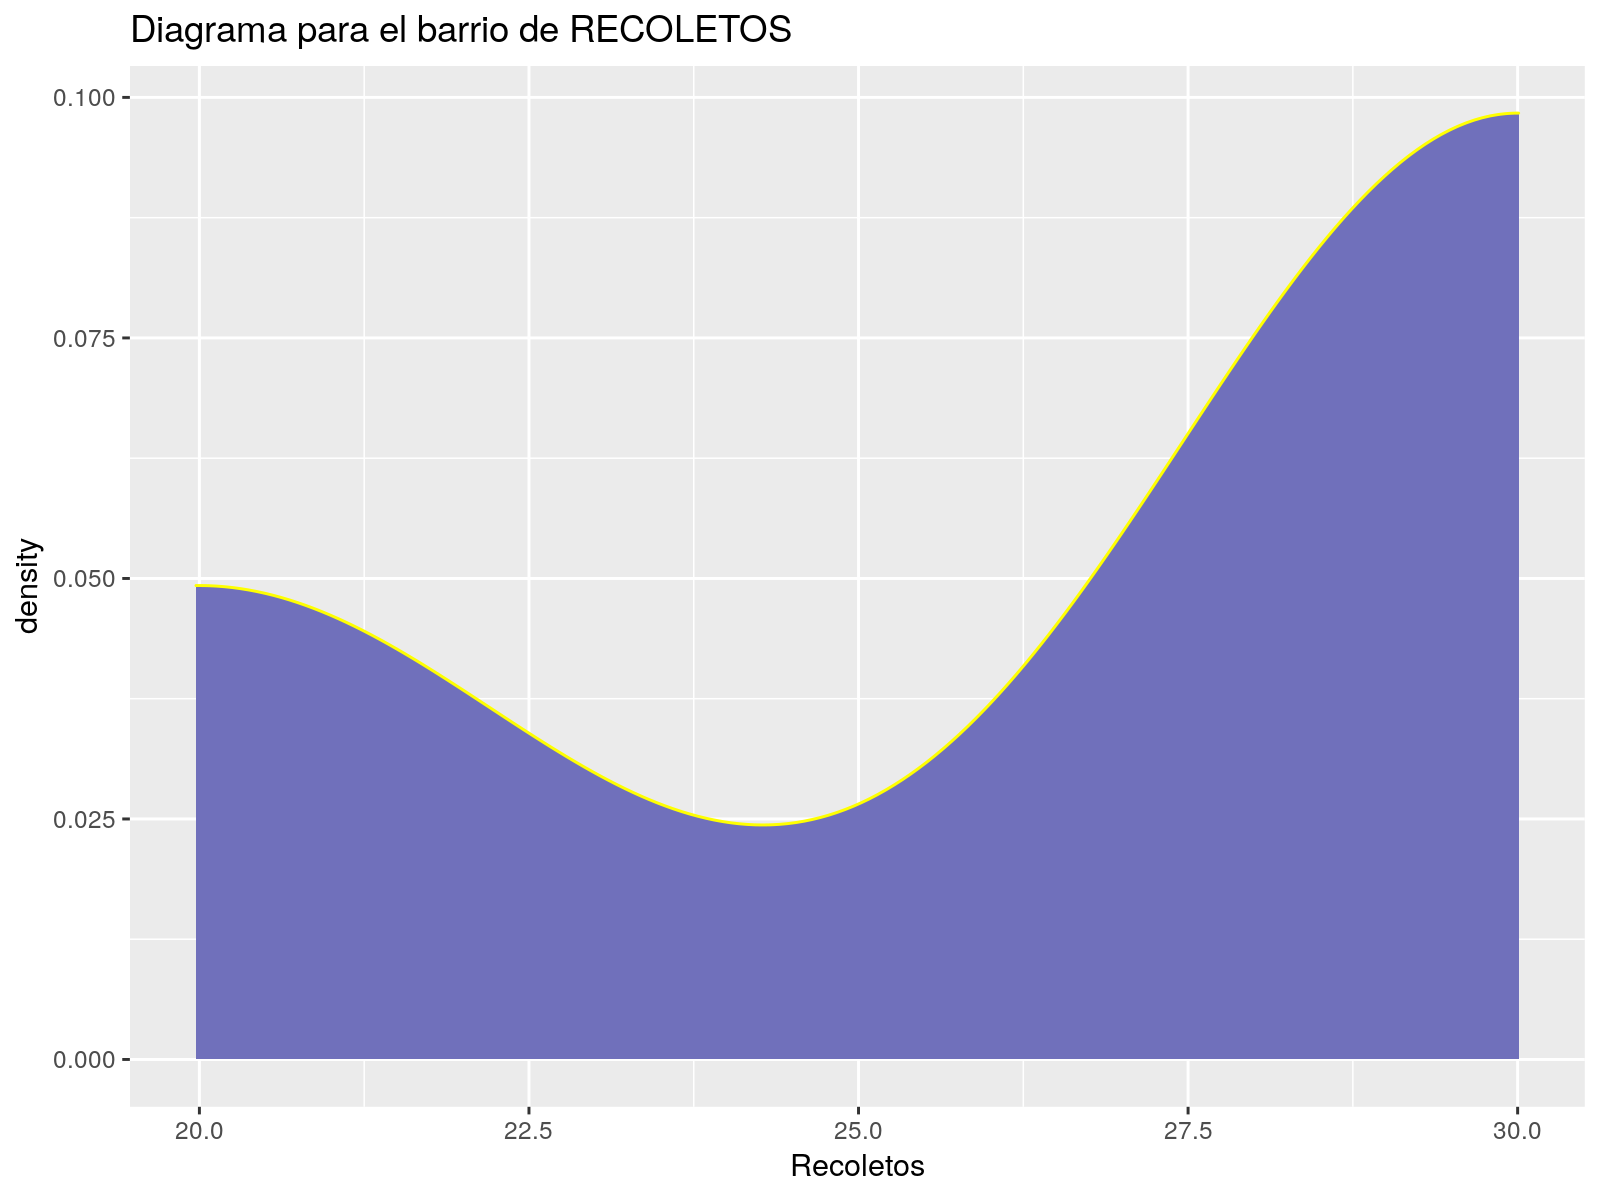

In [29]:
barrioRecoletos = data.frame(airbnb_entire$MetrosCuadrados[airbnb_entire$Barrio=="Recoletos"])
names(barrioRecoletos) = c("Recoletos")

ggplot(data=barrioRecoletos, aes(x=Recoletos)) + geom_density(fill="#7070BB", color="yellow") +
ggtitle("Diagrama para el barrio de RECOLETOS")

Warning message:
“Removed 139 rows containing non-finite values (stat_density).”


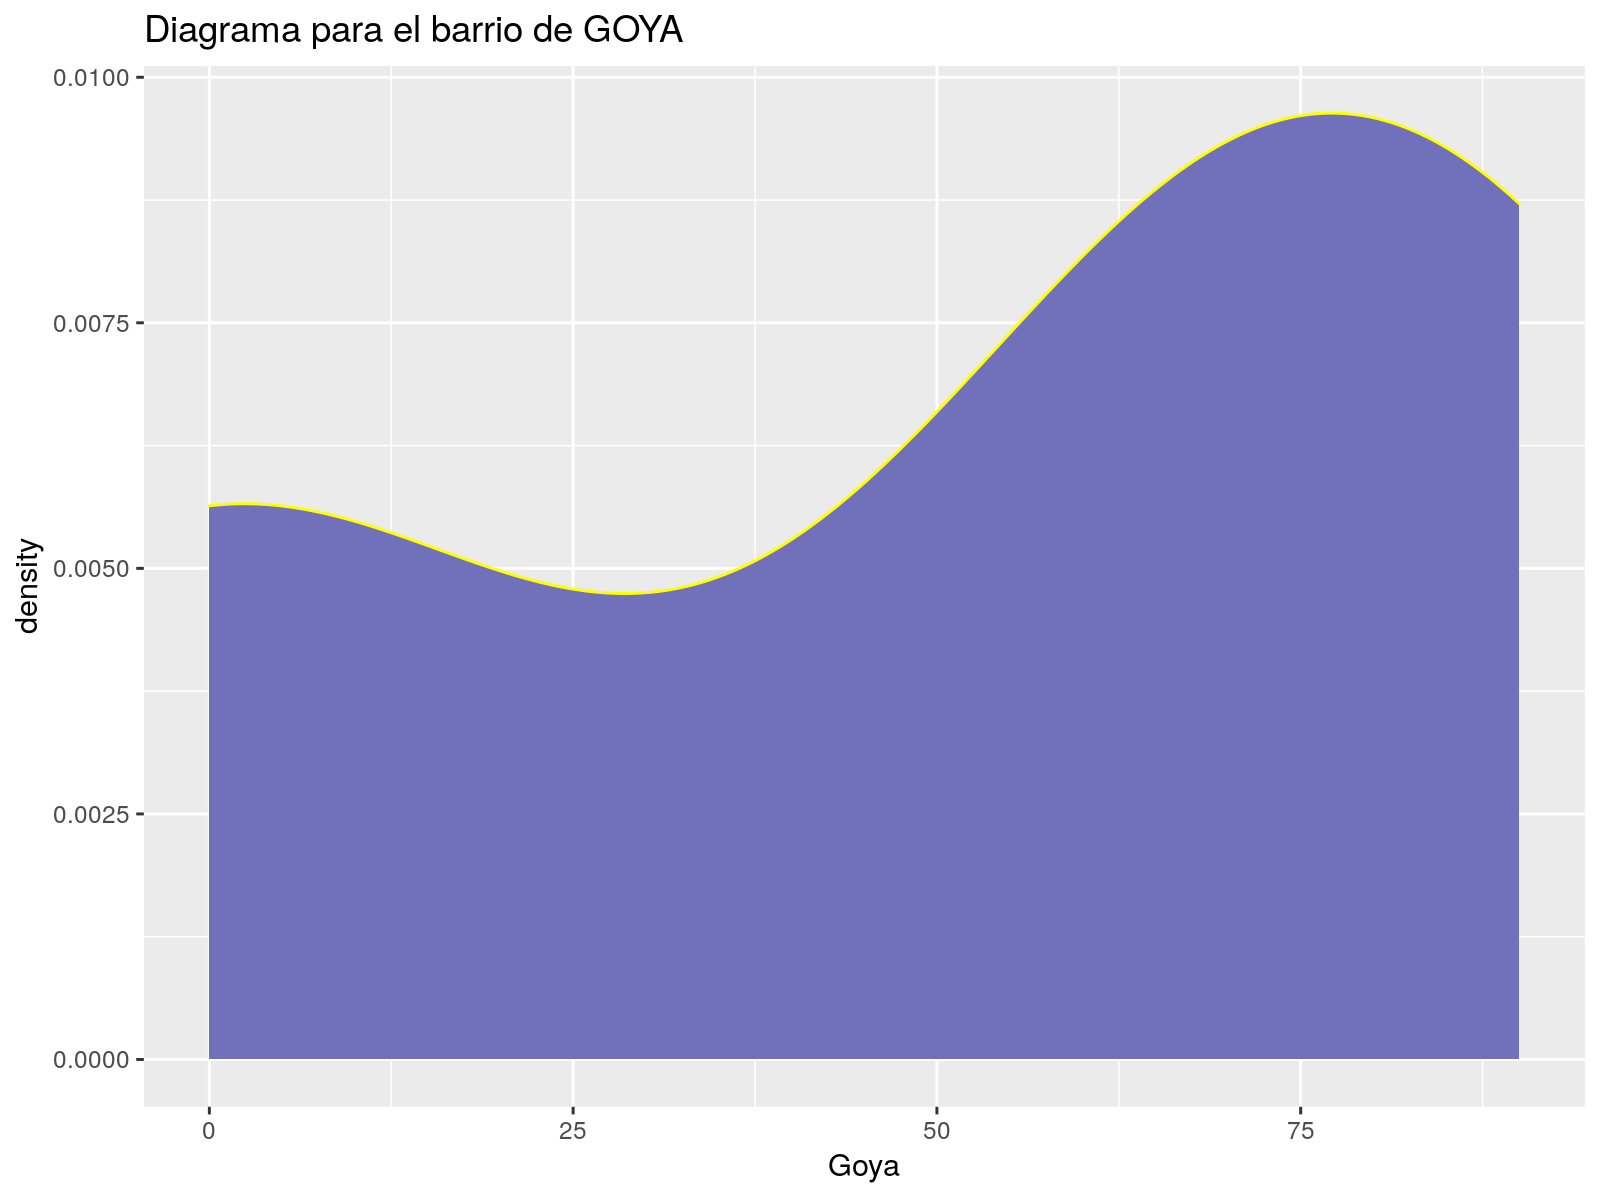

In [30]:
barrioGoya = data.frame(airbnb_entire$MetrosCuadrados[airbnb_entire$Barrio=="Goya"])
names(barrioGoya) = c("Goya")

ggplot(data=barrioGoya, aes(x=Goya)) + geom_density(fill="#7070BB", color="yellow") +
ggtitle("Diagrama para el barrio de GOYA")

Warning message:
“Removed 641 rows containing non-finite values (stat_density).”


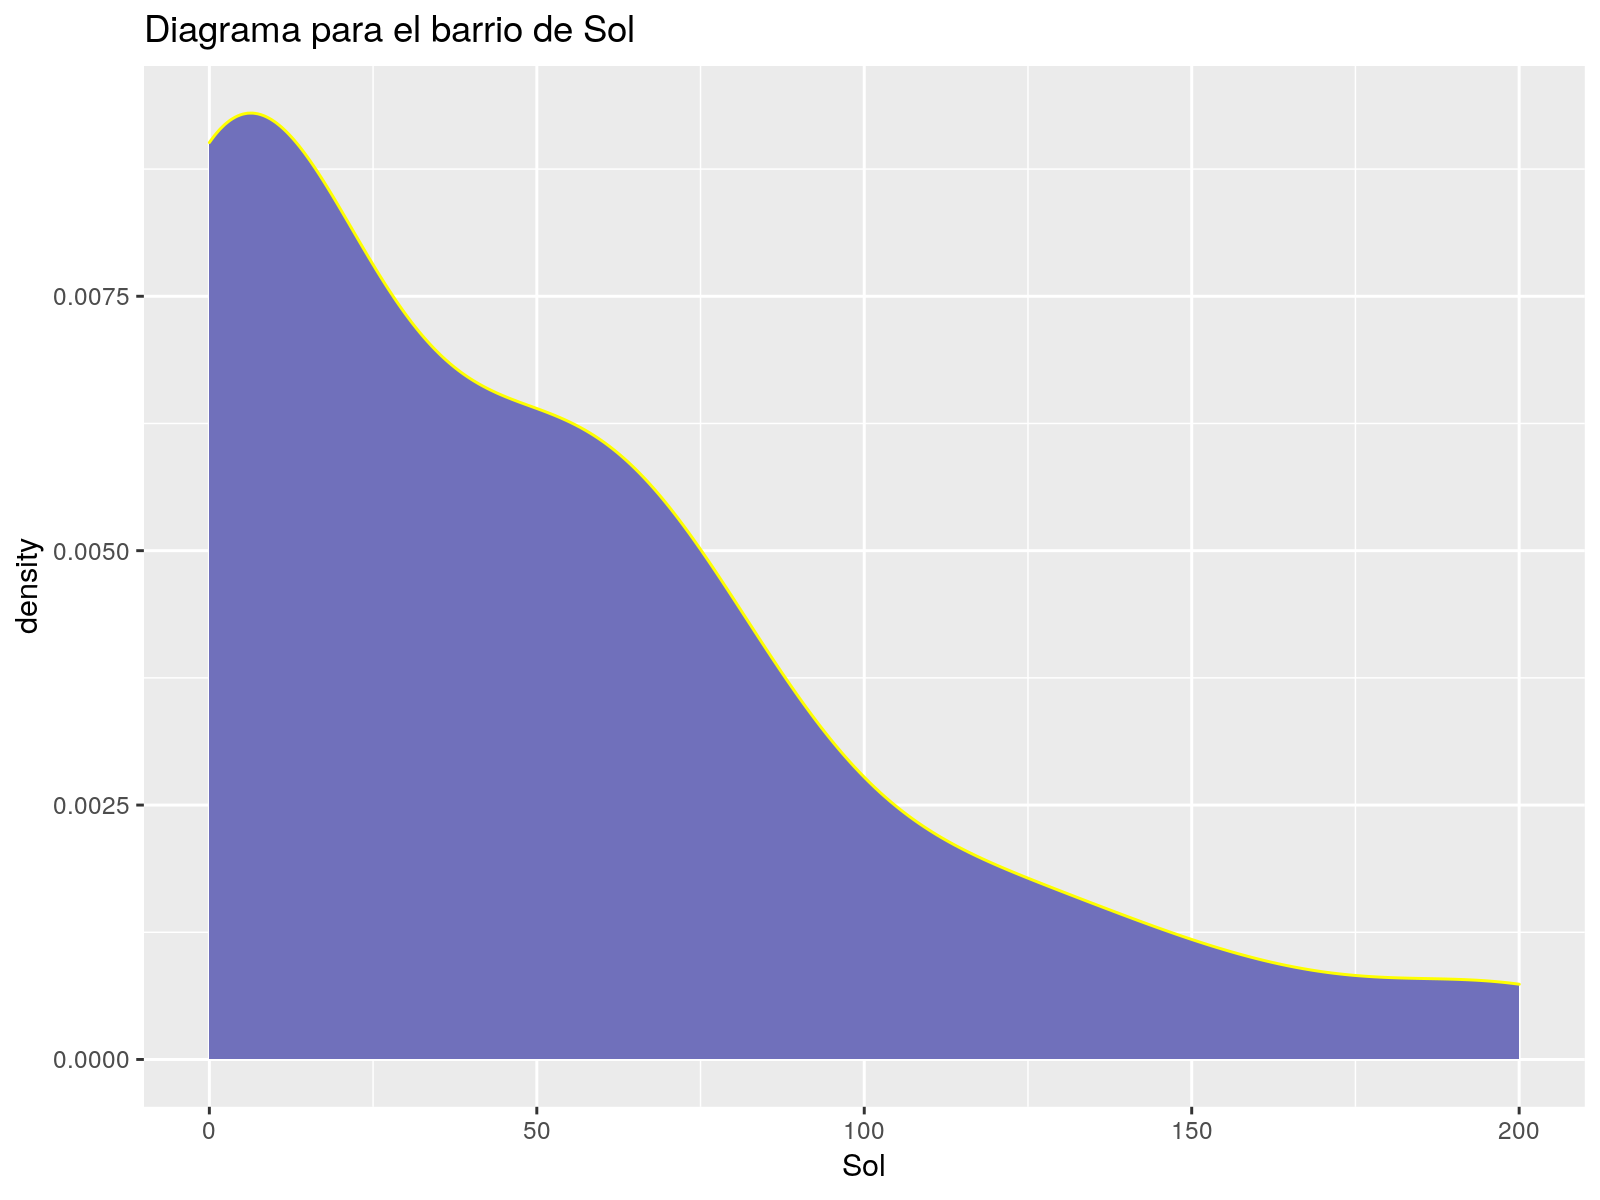

In [31]:
barrioSol = data.frame(airbnb_entire$MetrosCuadrados[airbnb_entire$Barrio=="Sol"])
names(barrioSol) = c("Sol")

ggplot(data=barrioSol, aes(x=Sol)) + geom_density(fill="#7070BB", color="yellow") +
ggtitle("Diagrama para el barrio de Sol")

Warning message:
“Removed 216 rows containing non-finite values (stat_density).”


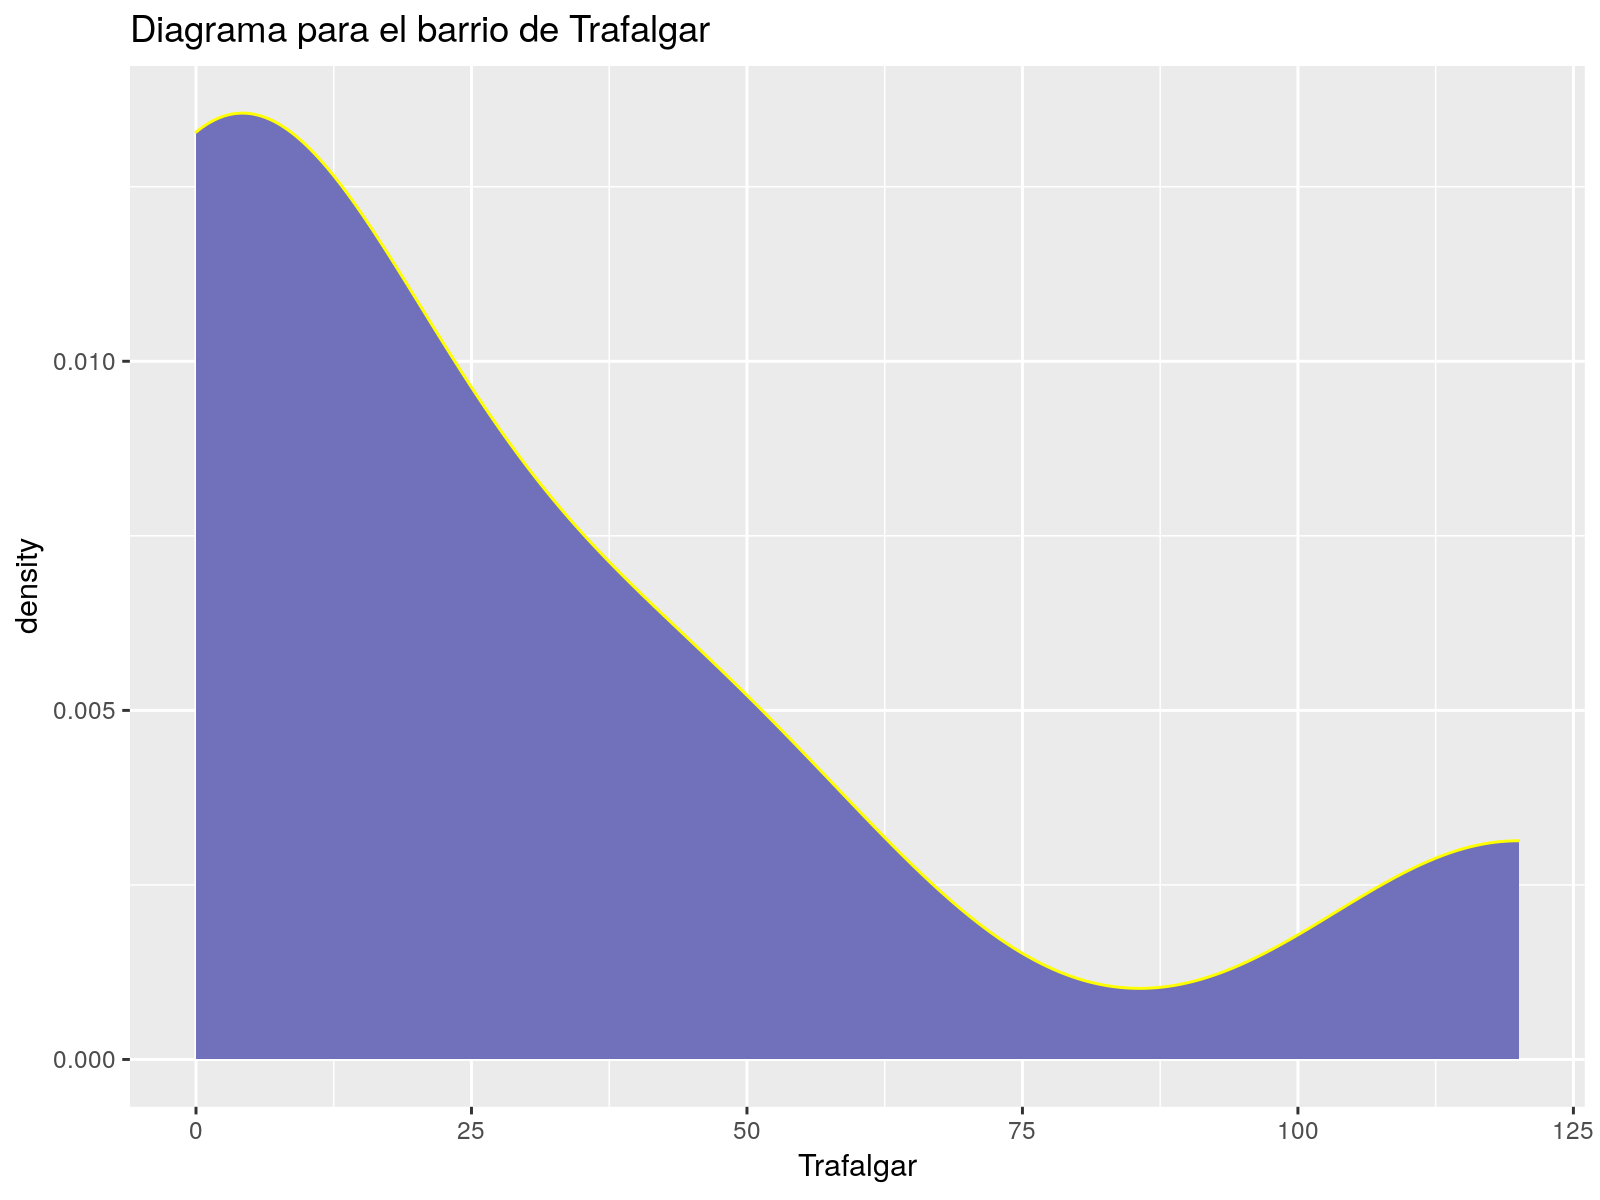

In [32]:
barrioTrafalgar = data.frame(airbnb_entire$MetrosCuadrados[airbnb_entire$Barrio=="Trafalgar"])
names(barrioTrafalgar) = c("Trafalgar")

ggplot(data=barrioTrafalgar, aes(x=Trafalgar)) + geom_density(fill="#7070BB", color="yellow") +
ggtitle("Diagrama para el barrio de Trafalgar")

Warning message:
“Removed 517 rows containing non-finite values (stat_density).”


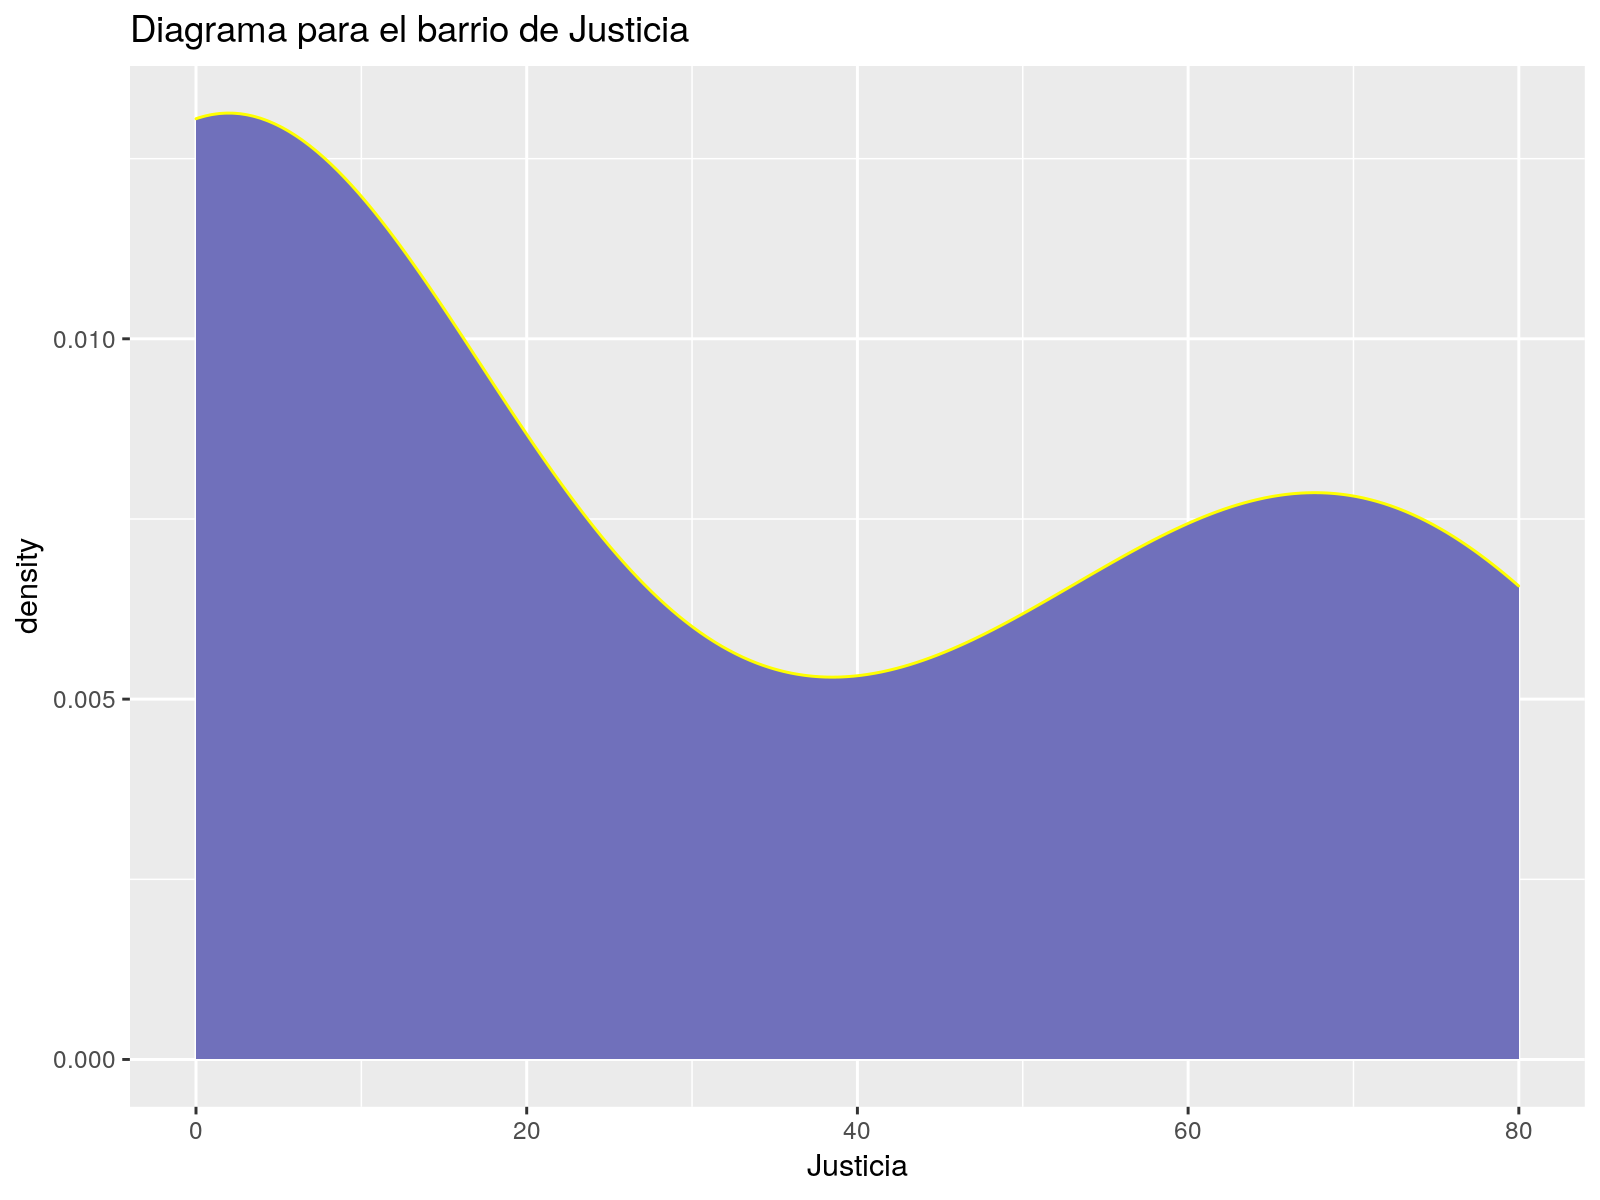

In [33]:
barrioJusticia = data.frame(airbnb_entire$MetrosCuadrados[airbnb_entire$Barrio=="Justicia"])
names(barrioJusticia) = c("Justicia")

ggplot(data=barrioJusticia, aes(x=Justicia)) + geom_density(fill="#7070BB", color="yellow") +
ggtitle("Diagrama para el barrio de Justicia")

--------

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes? ¿Que test habría que usar para comprobarlo?

**Antes de poder realizar un test u otro, deberíamos comprobar si existe normalidad en las funciones de distribución anteriores. Solo observando las gráficas, se puede deducir que no parecen ser funciones gaussianas. Hagamos un ejemplo con la gráfica que más parecida a una gaussiana tenemos para confirmar. Usaremos el test Shapiro con el digrama de Justicia**

In [34]:
shapiro.test(barrioJusticia$Justicia)


	Shapiro-Wilk normality test

data:  barrioJusticia$Justicia
W = 0.76212, p-value = 0.0006419


**El p-valor es muy bajo por lo tanto rechazamos la hipótesis nula. Es decir, la distribución no es normal. Dicho esto, hemos de rechazar el test ANOVA y utilizaremos el test de Kruskal para responder a la pregunta de este ejercicio**

In [35]:
BarriosEntireMerge = merge.data.frame(x = BarriosEntireMerge, y = BarriosEntireMetrosCuadrados, by = "Barrio", all=T)

In [36]:
kruskal.test(MetrosCuadrados~Barrio, data=BarriosEntireMerge)


	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 55, df = 55, p-value = 0.4746


**Aquí el p-valor ya es considerablemente alto, lo cual nos hace aceptar la hipótesis nula: las muestras (los barrios) vienen de una misma población (Madrid)**

---

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [37]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")
names(barrio_sol)

[1] "CodigoPostal"    "Barrio"          "TipoPropiedad"   "TipoAlquiler"   
 [5] "MaxOcupantes"    "NumBanyos"       "NumDormitorios"  "NumCamas"       
 [9] "TipoCama"        "Comodidades"     "PiesCuadrados"   "Precio"         
[13] "Puntuacion"      "MetrosCuadrados"

In [38]:
model <- lm(data=barrio_sol, formula= NumBanyos ~ NumDormitorios)
summary(model)


Call:
lm(formula = NumBanyos ~ NumDormitorios, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2028 -0.1110 -0.1110  0.2529  2.1611 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.7471     0.0264   28.30   <2e-16 ***
NumDormitorios   0.3639     0.0150   24.27   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3999 on 699 degrees of freedom
Multiple R-squared:  0.4572,	Adjusted R-squared:  0.4565 
F-statistic: 588.8 on 1 and 699 DF,  p-value: < 2.2e-16


In [39]:
model$coefficients

(Intercept) NumDormitorios 
     0.7470808      0.3639292

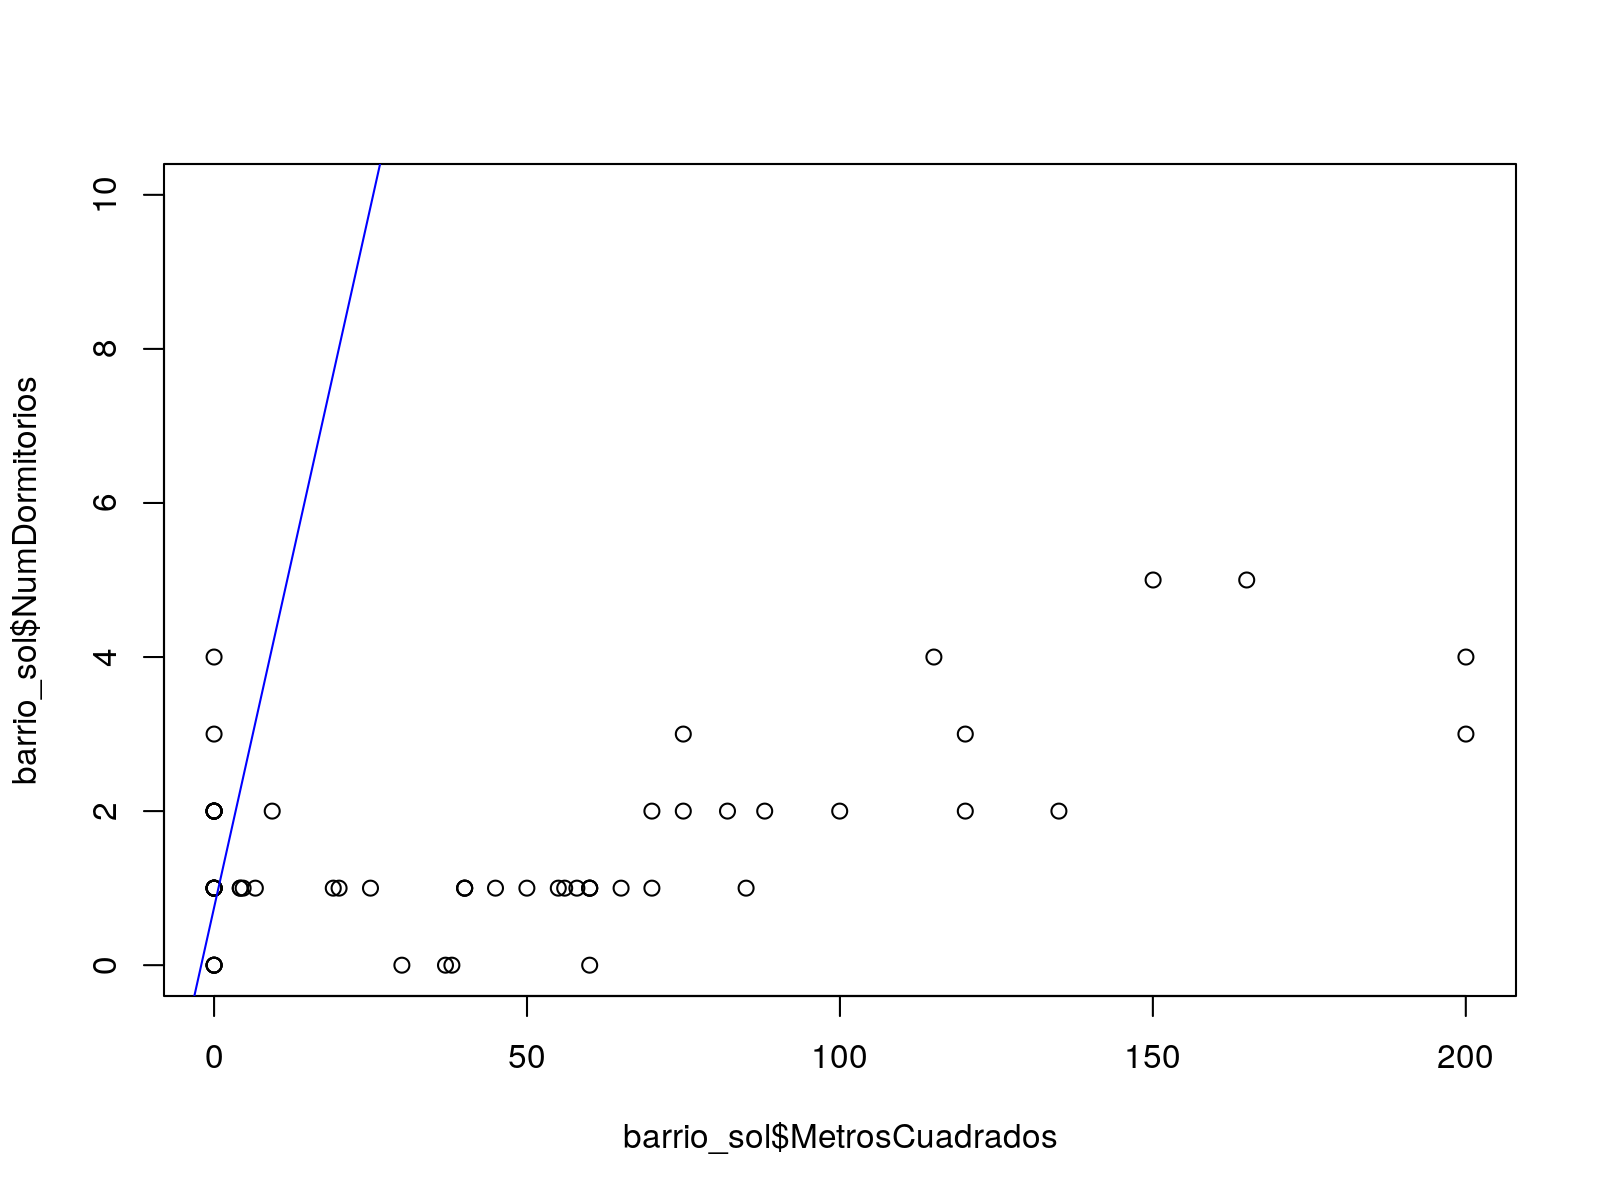

In [40]:
plot(barrio_sol$MetrosCuadrados, barrio_sol$NumDormitorios)
abline(model$coefficients,col="blue")

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [41]:
cor((barrio_sol$NumDormitorios),(barrio_sol$MetrosCuadrados),use="complete.obs")

[1] 0.5684521

---

Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja. ¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol, para tener una matriz de correlación que tenga mayor sentido.

Warning message:
“Removed 641 rows containing non-finite values (stat_bin).”


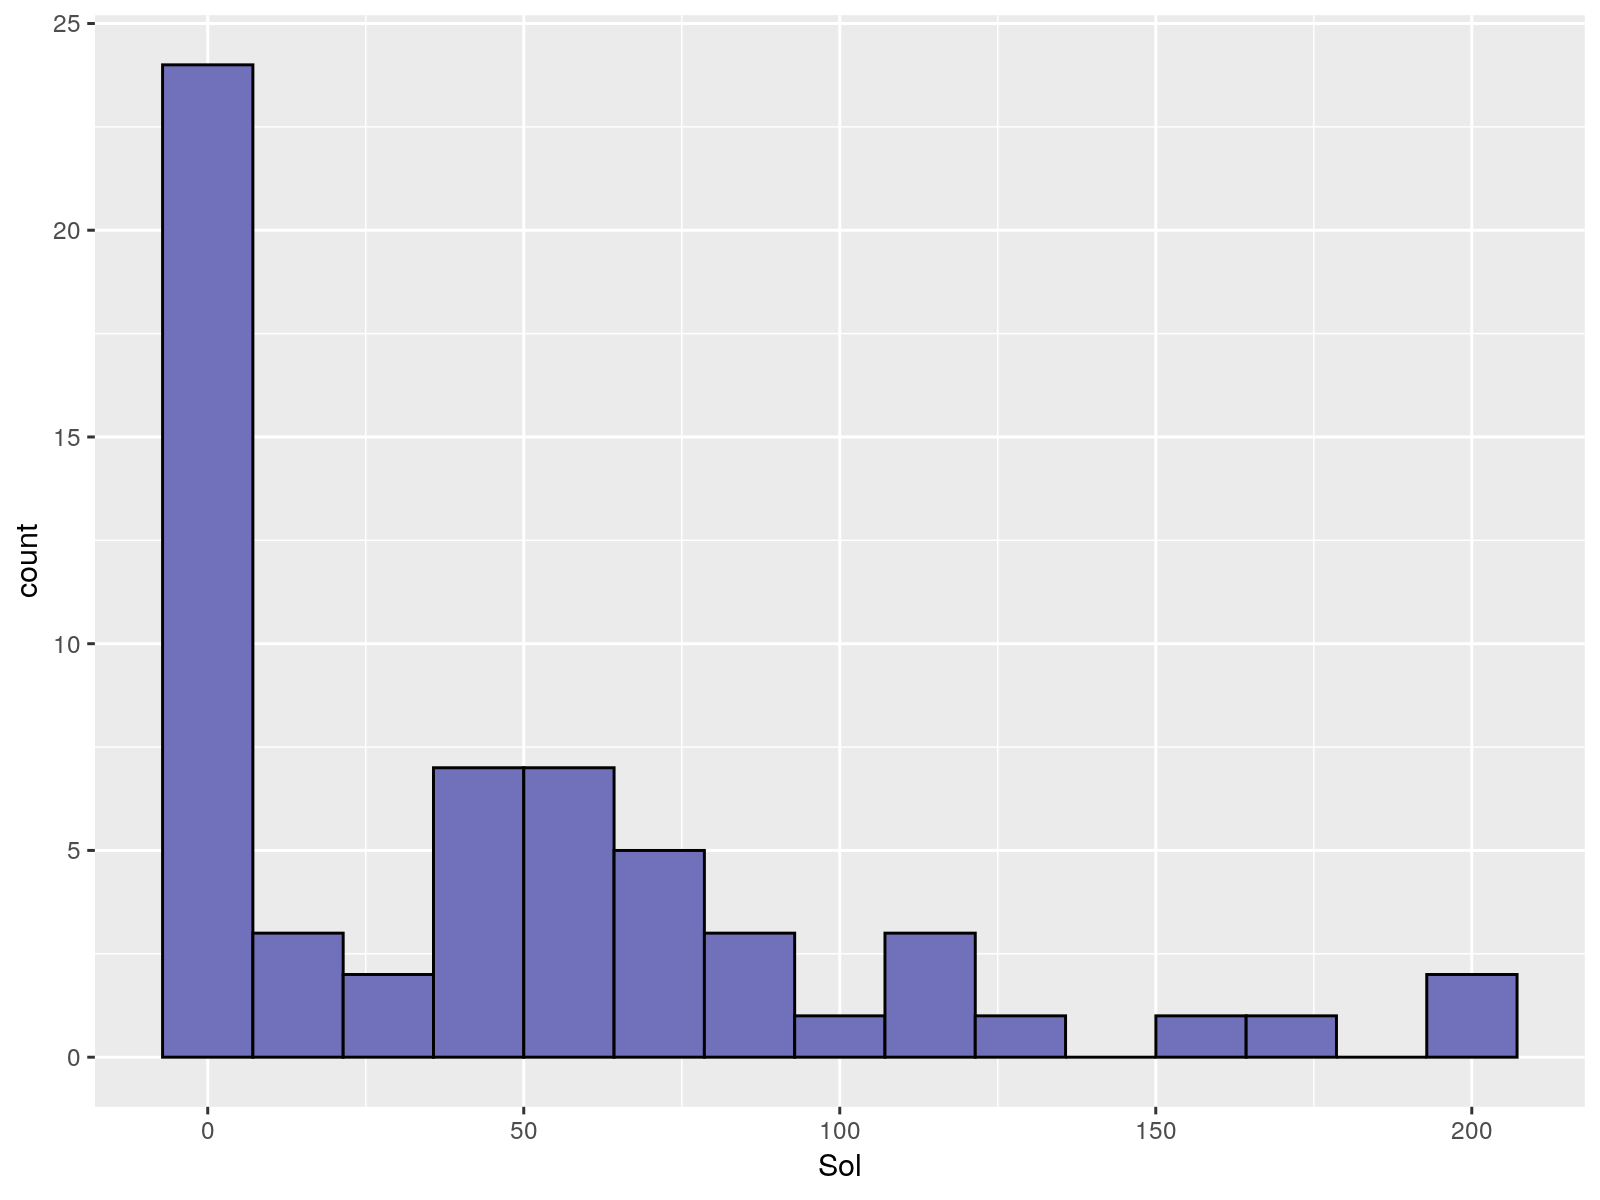

In [42]:
ggplot(data=barrioSol, aes(x=Sol)) + 
 geom_histogram(bins=15,fill="#7070BB",color="#010101")

**Podemos observar que hay una gran cantidad de apartamentos con 0 Metros Cuadrados. Probablemente estos valores nulos debemos eliminarlos ya que no cobra sentido un apartamento con 0 metros cuadrados pero que tenga una o varias habitaciones**

In [43]:
barrios_sol_filter = filter(barrio_sol, MetrosCuadrados>10)

In [44]:
barrios_sol_filter

CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
<dbl>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
28013,Sol,Apartment,Entire home/apt,4,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Suitable for events,Washer,Essentials,Hangers,Hair dryer,Iron",646,75,91,60.01534
28012,Sol,Apartment,Entire home/apt,4,1,1,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Hair dryer,Iron",753,100,87,69.95596
28013,Sol,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,First aid kit,Essentials,Shampoo,Hair dryer,Iron",269,65,93,24.99091
28014,Sol,Apartment,Entire home/apt,8,2,4,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Smoking allowed,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Fire extinguisher,Shampoo,Hangers,Iron,Laptop friendly workspace",2153,250,99,200.02016
28012,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Shampoo",538,108,95,49.98181
28012,Sol,Apartment,Entire home/apt,10,2,2,6,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials",1453,98,94,134.98806
28013,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Pets live on this property,Cat(s),Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo",915,70,100,85.00624
28012,Sol,Loft,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace",431,77,80,40.04119
28013,Sol,Apartment,Entire home/apt,3,1,0,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Private entrance",646,45,97,60.01534


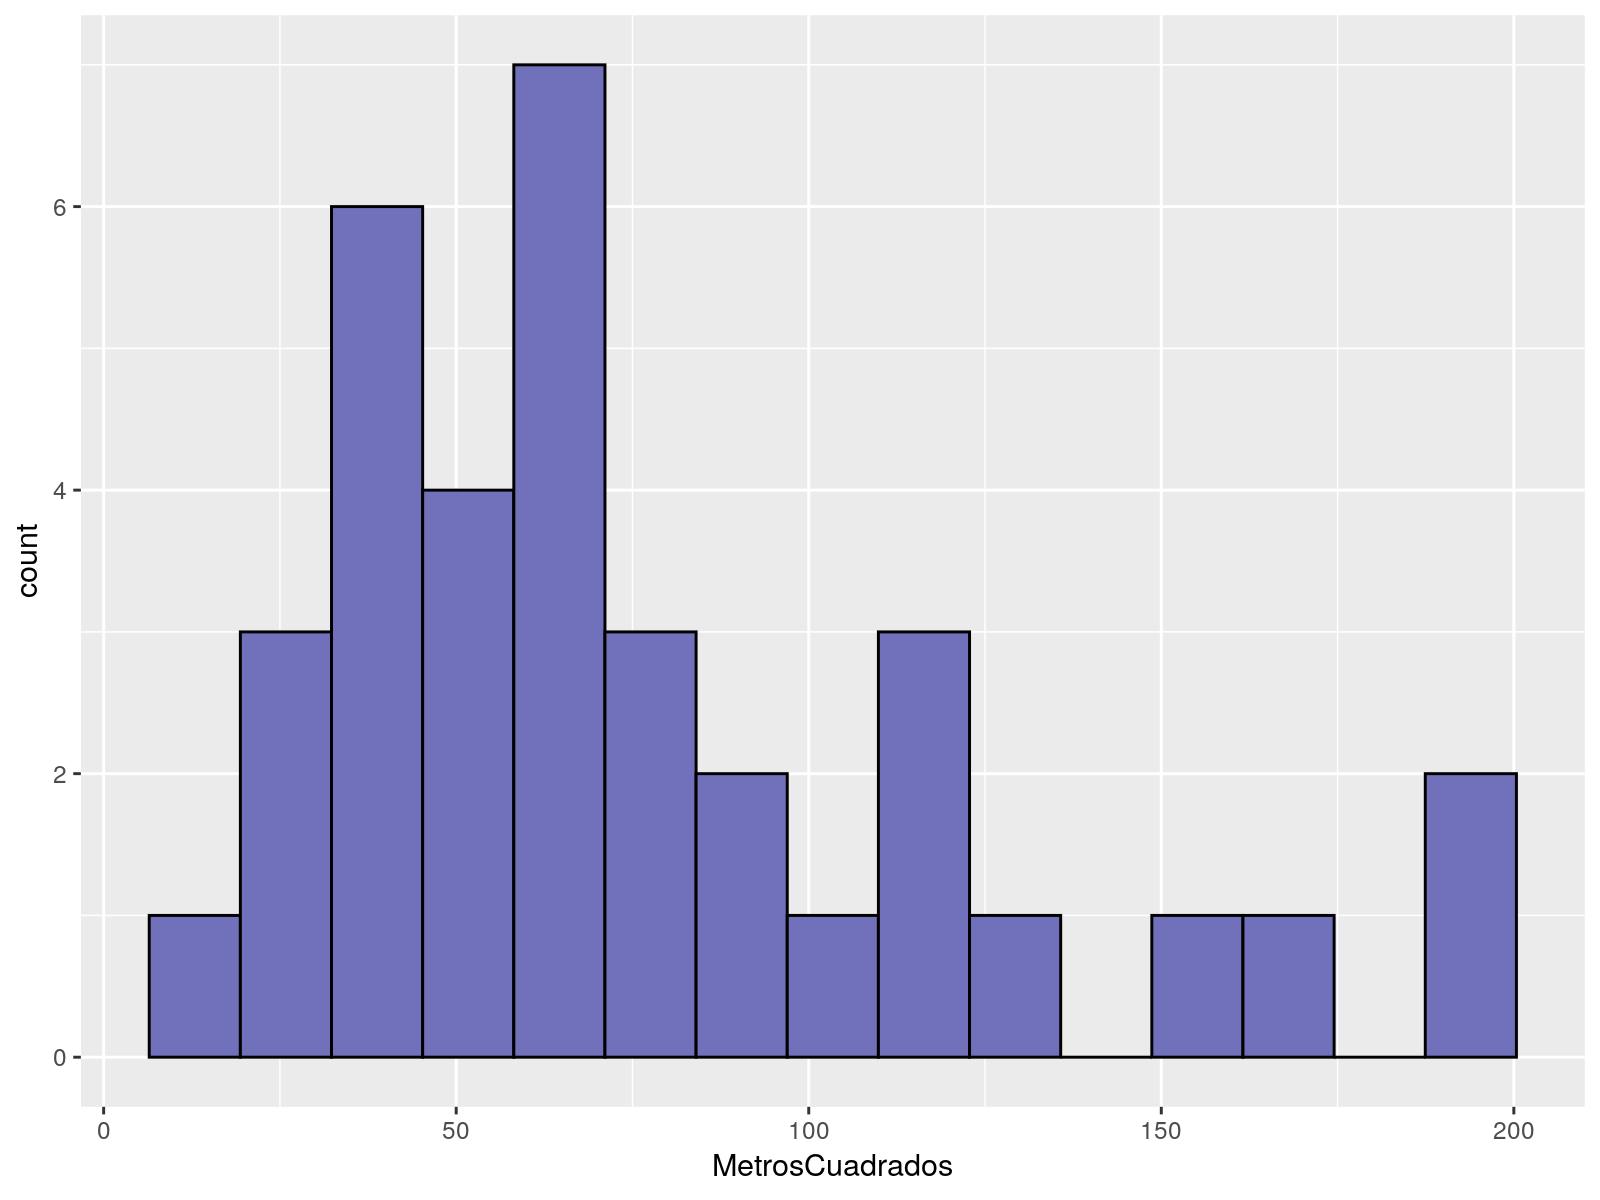

In [45]:
barrio_sol_metros = data.frame(barrios_sol_filter[,"MetrosCuadrados"])
names(barrio_sol_metros)= c("MetrosCuadrados")

ggplot(data=barrio_sol_metros, aes(x=MetrosCuadrados)) + 
 geom_histogram(bins=15,fill="#7070BB",color="#010101")

**Comprobemos si el índice de correlación ha mejorado**

In [46]:
cor((barrios_sol_filter$NumDormitorios),(barrios_sol_filter$MetrosCuadrados),use="complete.obs")

[1] 0.8215065

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [47]:
modelMul<-lm(data=barrios_sol_filter, formula = Precio ~ NumBanyos+NumDormitorios+MaxOcupantes+MetrosCuadrados)
summary(modelMul)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrios_sol_filter)

Residuals:
    Min      1Q  Median      3Q     Max 
-76.852 -13.673  -5.048  18.523  69.473 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      28.0362    12.9584   2.164  0.03859 * 
NumBanyos         0.5647    14.6038   0.039  0.96941   
NumDormitorios   28.2119     8.5440   3.302  0.00249 **
MaxOcupantes      2.6738     4.4329   0.603  0.55093   
MetrosCuadrados   0.2237     0.2050   1.091  0.28393   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.32 on 30 degrees of freedom
Multiple R-squared:  0.7588,	Adjusted R-squared:  0.7267 
F-statistic:  23.6 on 4 and 30 DF,  p-value: 6.728e-09


In [48]:
confint(modelMul)

,2.5 %,97.5 %
(Intercept),1.5716069,54.5007236
NumBanyos,-29.2603255,30.3897387
NumDormitorios,10.7626549,45.6611489
MaxOcupantes,-6.3794561,11.7270432
MetrosCuadrados,-0.1950286,0.6424357


**Según el estudio estadístico, la variable que más afecta al precio es el número de dormitorios (lo cual parece lógico a la intuición). Los metros cuadrados no han dado un resultado estadístico significativo**

In [51]:
modelMul<-lm(data=barrios_sol_filter, formula = Precio ~ NumDormitorios)
summary(modelMul)


Call:
lm(formula = Precio ~ NumDormitorios, data = barrios_sol_filter)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.704 -17.010  -5.768  19.490  61.296 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      41.283      8.554   4.826 3.08e-05 ***
NumDormitorios   39.484      4.078   9.682 3.61e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.03 on 33 degrees of freedom
Multiple R-squared:  0.7396,	Adjusted R-squared:  0.7317 
F-statistic: 93.75 on 1 and 33 DF,  p-value: 3.611e-11


---

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [50]:
modelMul<-lm(data=barrios_sol_filter, formula = Precio ~ MetrosCuadrados)
summary(modelMul)
confint(modelMul)


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrios_sol_filter)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.154 -18.405  -0.139   9.146 122.102 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      30.9151    12.6752   2.439   0.0203 *  
MetrosCuadrados   0.9796     0.1404   6.978  5.6e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.65 on 33 degrees of freedom
Multiple R-squared:  0.5961,	Adjusted R-squared:  0.5838 
F-statistic:  48.7 on 1 and 33 DF,  p-value: 5.596e-08


,2.5 %,97.5 %
(Intercept),5.1272761,56.70291
MetrosCuadrados,0.6940201,1.26525


**Un modelo que tenga en cuenta solo los metros cuadrados arroja que por cada metro cuadrado, el precio sube 0.97€ con margen de error (0.69 , 1.27). Esto supondría que la diferencia de precio entre dos pisos que tengan 50 y 60 metros cuadrados se diferenciarán en 10€/noche aprox.**

---

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [52]:
modelMul<-lm(data=barrios_sol_filter, formula = Precio ~ NumDormitorios)
summary(modelMul)
confint(modelMul)


Call:
lm(formula = Precio ~ NumDormitorios, data = barrios_sol_filter)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.704 -17.010  -5.768  19.490  61.296 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      41.283      8.554   4.826 3.08e-05 ***
NumDormitorios   39.484      4.078   9.682 3.61e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.03 on 33 degrees of freedom
Multiple R-squared:  0.7396,	Adjusted R-squared:  0.7317 
F-statistic: 93.75 on 1 and 33 DF,  p-value: 3.611e-11


,2.5 %,97.5 %
(Intercept),23.87992,58.68671
NumDormitorios,31.18746,47.78095


**Según este estudio, un apartamento con una habitación más cuesta de media y de manera aproximada 39.48€ más con margen de error de (31.18 , 47.79)**

---

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios? ¿Cual es el intervalo de confianza de esa probabilidad?

In [65]:
?data.frame

Warning message in seq_len(head.end.idx):
“first element used of 'length.out' argument”
ERROR while rich displaying an object: Error in seq_len(head.end.idx): argument must be coercible to non-negative integer

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_conte

In [68]:
NumDormitorios = c(1:3)
newSol = data.frame(NumDormitorioss)


In [69]:
pred = predict(modelMul, newdata = newSol, interval = "prediction")
pred

,fit,lwr,upr
1,80.76752,16.51654,145.0185
2,120.25173,56.16932,184.3341
3,159.73593,94.75446,224.7174


**De aquí extraemos que el precio para 3 dormitorios sería de 159.74€ dentro de un intervalo entre (94.7, 224.72)**